In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


Hi everyone, my name is Yohanes Kurniawan Hertanto.

It has been a while since the last time I practiced on dataset analysis due to my final assignment given by an online course organizer.

This time I'm going to practice my logical thinking on a dataset provided by grocery store firm through Kaggle. The dataset contains customer purchasing behavior during a certain period of time. I'm going to do some data cleaning and grouping customers based on their purchasing behavior. After that, I'm going to create an **unsupervised data clustering model** based on selected relevant features in the dataset.

By doing to these activities, I hope that I can get deep insights of the firm's business situation and can provide suggestions for the firm's future business plans.

## I. IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import FuncFormatter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## II. LOAD AND CHECK THE DATASET

In [ ]:
# Uploading the dataset into the Kaggle notebook
df_customer = pd.read_csv('https://raw.githubusercontent.com/yohaneskh/Customer-Purchasing-Behavior-Analysis_Finished/refs/heads/main/marketing_campaign.csv', sep='\t')

# Displaying the dataset head for early identification
df_customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Displaying the variables (columns) names of the dataset
col_names = df_customer.columns
col_names

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# Displaying the summary and dimensions of the dataset
df_customer.info()
df_customer.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(2240, 29)

So, based on the provided dataset above, these are the **29 columns (variables)** with **2,240 lines** that I'm going to analyze, clean and process. Based on my observation, they are divided into some categories as following:

1. **People**:
- ID: Unique identifier for each customer.
- Year_Birth: Customer's birth year.
- Education: Customer's education level.
- Marital_Status: Customer's marital status.
- Income: Customer's Yearly household income.
- Kidhome: Number of children in the household.
- Teenhome: Number of teenagers in the household.
- Dt_Customer: Date of Customer enrollment.
- Recency: Number of days since the last purchase.
- Complain: 1 if the Customer complained in the last 2 years, 0 otherwise.

2. **Products, amount spent on different product categories in the last 2 years**:
- MntWines: Various wine products.
- MntFruits: Fresh fruit products.
- MntMeatProducts: Fresh meat products.
- MntFishProducts: Fresh fish products.
- MntSweetProducts: Various candy and sweet products.
- MntGoldProds: Various gold and precious metal products.

3. **Promotional Campaign**:
- NumDealsPurchases: Number of purchases made with a discount.
- AcceptedCmp1:	1 if customer accepted the offer in the 1st campaign, 0 otherwise.
- AcceptedCmp2:	1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
- AcceptedCmp3:	1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
- AcceptedCmp4:	1 if customer accepted the offer in the 4th campaign, 0 otherwise.
- AcceptedCmp5:	1 if customer accepted the offer in the 5th campaign, 0 otherwise.
- Response:	1 if customer accepted the offer in the last campaign, 0 otherwise.

4. **Place**:
- NumWebPurchases: Number of purchases made through the company's website.
- NumCatalogPurchases: Number of purchases made using a catalogue.
- NumStorePurchases: Number of purchases made directly in stores.
- NumWebVisitsMonth: Number of visits to company's web site in the last month.

5. **Others**:
- Z_CostContact: Constant value (likely a placeholder) related to customer contact cost.
- Z_Revenue: Constant value (likely a placeholder) related to customer revenue.

I'm curious on the time range of the dataset, therefore I'm going to estimate the **data compilation period** by examining **Dt_Customer** variable.

In [ ]:
# Setting the timeframe as date-month-year with Python
df_customer['Dt_Customer'] = pd.to_datetime(df_customer['Dt_Customer'], dayfirst=True)

# Check the date range of customer enrollment date as an estimation
print("Earliest date of customer enrollment is", df_customer['Dt_Customer'].min())
print("Latest date of customer enrollment is", df_customer['Dt_Customer'].max())

Earliest date of customer enrollment is 2012-07-30 00:00:00
Latest date of customer enrollment is 2014-06-29 00:00:00


In [ ]:
# Counting the number of customer enrollment from 2012 to 2014
df_customer['Dt_Customer'].dt.year.value_counts().sort_index()

Dt_Customer
2012     494
2013    1189
2014     557
Name: count, dtype: int64

Based on the information above, now I know that the data is **PROBABLY compiled from 2012-2014 (2 years)**, the exact date is July 30th, 2012 until June 29th, 2014.

## III. DATA PREPARATION

### PART 1 OF DATA PREPARATION

Before I proceed to analyze the data distribution, encoding, scaling etc of the dataset, I'm going to do some Data Preparation procedures such as,

1. Check unique values inside each feature.
2. Check data distribution.
3. Handle any duplicated values.
4. Handle any missing values.

**1. Check unique values inside each feature**

Since features like **ID** surely have lots of unique values, I'm not going to check and count unique values from it.

In [ ]:
# Show the proportion of customers' Year_Birth
df_customer["Year_Birth"].value_counts(normalize=True).mul(100).round(2).sort_index()

Year_Birth
1893    0.04
1899    0.04
1900    0.04
1940    0.04
1941    0.04
1943    0.31
1944    0.31
1945    0.36
1946    0.71
1947    0.71
1948    0.94
1949    1.34
1950    1.29
1951    1.92
1952    2.32
1953    1.56
1954    2.23
1955    2.19
1956    2.46
1957    1.92
1958    2.37
1959    2.28
1960    2.19
1961    1.61
1962    1.96
1963    2.01
1964    1.88
1965    3.30
1966    2.23
1967    1.96
1968    2.28
1969    3.17
1970    3.44
1971    3.88
1972    3.53
1973    3.30
1974    3.08
1975    3.71
1976    3.97
1977    2.32
1978    3.44
1979    2.37
1980    1.74
1981    1.74
1982    2.01
1983    1.88
1984    1.70
1985    1.43
1986    1.88
1987    1.21
1988    1.29
1989    1.34
1990    0.80
1991    0.67
1992    0.58
1993    0.22
1994    0.13
1995    0.22
1996    0.09
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on their Education
df_customer["Education"].value_counts(normalize=True).mul(100).round(2).sort_index()

Education
2n Cycle       9.06
Basic          2.41
Graduation    50.31
Master        16.52
PhD           21.70
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on their Marital_Status
df_customer["Marital_Status"].value_counts(normalize=True).mul(100).round(2).sort_index()

# Now if I check the results below, there are some abnormal values of Marital_Status
# For example, Absurd, Alone and YOLO which don't make sense at all

Marital_Status
Absurd       0.09
Alone        0.13
Divorced    10.36
Married     38.57
Single      21.43
Together    25.89
Widow        3.44
YOLO         0.09
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on their yearly household Income
df_customer["Income"].value_counts(normalize=True).mul(100).round(2).sort_index()

Income
1730.0      0.05
2447.0      0.05
3502.0      0.05
4023.0      0.05
4428.0      0.05
            ... 
157243.0    0.05
157733.0    0.05
160803.0    0.05
162397.0    0.05
666666.0    0.05
Name: proportion, Length: 1974, dtype: float64

In [ ]:
# Show the proportion of customers based on the number of children (Kidhome)
df_customer["Kidhome"].value_counts(normalize=True).mul(100).round(2).sort_index()

Kidhome
0    57.72
1    40.13
2     2.14
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on the number of teenage (Teenhome)
df_customer["Teenhome"].value_counts(normalize=True).mul(100).round(2).sort_index()

Teenhome
0    51.70
1    45.98
2     2.32
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on their enrollment date with the store
df_customer["Dt_Customer"].value_counts(normalize=True).mul(100).round(2).sort_index()

Dt_Customer
2012-07-30    0.04
2012-07-31    0.04
2012-08-01    0.18
2012-08-02    0.13
2012-08-03    0.22
              ... 
2014-06-25    0.22
2014-06-26    0.18
2014-06-27    0.13
2014-06-28    0.13
2014-06-29    0.09
Name: proportion, Length: 663, dtype: float64

In [ ]:
# Show the proportion of customers based on their Recency
df_customer["Recency"].value_counts(normalize=True).mul(100).round(2).sort_index()

Recency
0     1.25
1     1.07
2     1.25
3     1.29
4     1.21
      ... 
95    0.85
96    1.12
97    0.89
98    0.98
99    0.76
Name: proportion, Length: 100, dtype: float64

In [ ]:
# Show the proportion of customers' Complain
df_customer["Complain"].value_counts(normalize=True).mul(100).round(2).sort_index()

Complain
0    99.06
1     0.94
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on the amount spent on wine (MntWines)
df_customer["MntWines"].value_counts(normalize=True).mul(100).round(2).sort_index()

MntWines
0       0.58
1       1.65
2       1.88
3       1.34
4       1.47
        ... 
1462    0.04
1478    0.09
1486    0.04
1492    0.09
1493    0.04
Name: proportion, Length: 776, dtype: float64

In [ ]:
# Show the proportion of customers based on the amount spent on fruits (MntFruits)
df_customer["MntFruits"].value_counts(normalize=True).mul(100).round(2).sort_index()

MntFruits
0      17.86
1       7.23
2       5.36
3       5.18
4       4.64
       ...  
190     0.04
193     0.09
194     0.13
197     0.04
199     0.09
Name: proportion, Length: 158, dtype: float64

In [ ]:
# Show the proportion of customers based on the amount spent on meat (MntMeatProducts)
df_customer["MntMeatProducts"].value_counts(normalize=True).mul(100).round(2).sort_index()

MntMeatProducts
0       0.04
1       0.62
2       1.34
3       1.79
4       1.34
        ... 
984     0.04
1582    0.04
1607    0.04
1622    0.04
1725    0.09
Name: proportion, Length: 558, dtype: float64

In [ ]:
# Show the proportion of customers based on the amount spent on fish (MntFishProducts)
df_customer["MntFishProducts"].value_counts(normalize=True).mul(100).round(2).sort_index()

MntFishProducts
0      17.14
1       0.45
2       6.96
3       5.80
4       4.82
       ...  
250     0.13
253     0.04
254     0.04
258     0.13
259     0.04
Name: proportion, Length: 182, dtype: float64

In [ ]:
# Show the proportion of customers based on the amount spent on sweets (MntSweetProducts)
df_customer["MntSweetProducts"].value_counts(normalize=True).mul(100).round(2).sort_index()

MntSweetProducts
0      18.71
1       7.19
2       5.71
3       4.51
4       3.66
       ...  
196     0.04
197     0.04
198     0.04
262     0.04
263     0.04
Name: proportion, Length: 177, dtype: float64

In [ ]:
# Show the proportion of customers based on the amount spent on gold (MntGoldProds)
df_customer["MntGoldProds"].value_counts(normalize=True).mul(100).round(2).sort_index()

MntGoldProds
0      2.72
1      3.26
2      2.77
3      3.08
4      3.12
       ... 
249    0.04
262    0.04
291    0.04
321    0.04
362    0.04
Name: proportion, Length: 213, dtype: float64

In [ ]:
# Show the proportion of customers based on the number of purchases made with a discount (NumDealsPurchases)
df_customer["NumDealsPurchases"].value_counts(normalize=True).mul(100).round(2).sort_index()

NumDealsPurchases
0      2.05
1     43.30
2     22.19
3     13.26
4      8.44
5      4.20
6      2.72
7      1.79
8      0.62
9      0.36
10     0.22
11     0.22
12     0.18
13     0.13
15     0.31
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on campaign effectiveness (AcceptedCmp1)
df_customer["AcceptedCmp1"].value_counts(normalize=True).mul(100).round(2).sort_index()

AcceptedCmp1
0    93.57
1     6.43
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on campaign effectiveness (AcceptedCmp2)
df_customer["AcceptedCmp2"].value_counts(normalize=True).mul(100).round(2).sort_index()

AcceptedCmp2
0    98.66
1     1.34
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on campaign effectiveness (AcceptedCmp3)
df_customer["AcceptedCmp3"].value_counts(normalize=True).mul(100).round(2).sort_index()

AcceptedCmp3
0    92.72
1     7.28
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on campaign effectiveness (AcceptedCmp4)
df_customer["AcceptedCmp4"].value_counts(normalize=True).mul(100).round(2).sort_index()

AcceptedCmp4
0    92.54
1     7.46
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on campaign effectiveness (AcceptedCmp5)
df_customer["AcceptedCmp5"].value_counts(normalize=True).mul(100).round(2).sort_index()

AcceptedCmp5
0    92.72
1     7.28
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on their acceptance in the last campaign (Response)
df_customer["Response"].value_counts(normalize=True).mul(100).round(2).sort_index()

Response
0    85.09
1    14.91
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on their favorite purchasing channel (NumWebPurchases)
df_customer["NumWebPurchases"].value_counts(normalize=True).mul(100).round(2).sort_index()

NumWebPurchases
0      2.19
1     15.80
2     16.65
3     15.00
4     12.50
5      9.82
6      9.15
7      6.92
8      4.55
9      3.35
10     1.92
11     1.96
23     0.04
25     0.04
27     0.09
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on their favorite purchasing channel (NumCatalogPurchases)
df_customer["NumCatalogPurchases"].value_counts(normalize=True).mul(100).round(2).sort_index()

NumCatalogPurchases
0     26.16
1     22.19
2     12.32
3      8.21
4      8.12
5      6.25
6      5.71
7      3.53
8      2.46
9      1.88
10     2.14
11     0.85
22     0.04
28     0.13
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on their favorite purchasing channel (NumStorePurchases)
df_customer["NumStorePurchases"].value_counts(normalize=True).mul(100).round(2).sort_index()

NumStorePurchases
0      0.67
1      0.31
2      9.96
3     21.88
4     14.42
5      9.46
6      7.95
7      6.38
8      6.65
9      4.73
10     5.58
11     3.62
12     4.69
13     3.71
Name: proportion, dtype: float64

In [ ]:
# Show the proportion of customers based on the no. of visits to company's website in the last month (NumWebVisitsMonth)
df_customer["NumWebVisitsMonth"].value_counts(normalize=True).mul(100).round(2).sort_index()

NumWebVisitsMonth
0      0.49
1      6.83
2      9.02
3      9.15
4      9.73
5     12.54
6     15.18
7     17.54
8     15.27
9      3.71
10     0.13
13     0.04
14     0.09
17     0.04
19     0.09
20     0.13
Name: proportion, dtype: float64

**2. Check data distribution**

Next, I want to check data distribution (min, max, and quantile) of selected numerical features.

In [ ]:
df_customer[["Year_Birth", "Income", "Kidhome", "Teenhome",
             "Recency", "MntWines", "MntFruits", "MntMeatProducts",
            "MntFishProducts", "MntSweetProducts", "MntGoldProds",
            "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
            "NumStorePurchases", "NumWebVisitsMonth"]].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.81,11.98,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.25,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.44,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.51,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.11,28.96,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.06,41.28,0.0,1.00,8.0,33.00,263.0


**3. Handle any duplicated values**

Next, I want to check if the dataset has any duplicated values. For me, the best way is to check from **ID** feature, because each customer only have one ID.



In [ ]:
# Check for any duplicated values based on selected features
# keep=False means marking all duplicates
duplicated_value = df_customer.duplicated(subset=["ID"], keep=False)
df_customer_duplicate = df_customer[duplicated_value].sort_values(by=["ID"])

# Show any duplicated values
df_customer_duplicate

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


I can see that there are no duplicated values/lines inside the dataset.

**4. Handle any missing values**

Before I proceed any further, I realized that there are some missing values on Income variable, let's take a look at it.

In [ ]:
df_customer.isnull().sum()[df_customer.isnull().sum() > 0]

Income    24
dtype: int64

In [ ]:
df_customer[df_customer.isnull().any(axis=1)]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


There are 24 lines with mising Income values within the dataset. I'm going to fill the missing Income values with a single median value.

In [ ]:
median_income = df_customer["Income"].median()
df_customer["Income"].fillna(median_income, inplace=True)

/tmp/ipykernel_13/4268924490.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customer["Income"].fillna(median_income, inplace=True)


In [ ]:
# Double check for any missing values (NaN)
df_customer.isnull().sum()[df_customer.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

After the 4th step, now there are no missing values for each variable (column) at this moment, let's continue to next step which is checking for any anomalies and deciding what to do on those anomalies.

### PART 2 OF DATA PREPARATION

For this part, I'm going to focus on handling abnormal values, outliers, and EDA.

I remember that there were some weird values from **Marital_Status** variable, right now I'm going to take a look at them.

In [ ]:
# Show rows with anomalies from Marital_Status variable
unclear_marital_status = ['Absurd', 'Alone', 'YOLO']
df_unclear_marital_status = df_customer[df_customer['Marital_Status'].isin(unclear_marital_status)]
print(df_unclear_marital_status)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
131     433        1958      Master          Alone  61331.0        1   
138    7660        1973         PhD          Alone  35860.0        1   
153      92        1988  Graduation          Alone  34176.0        1   
2093   7734        1993  Graduation         Absurd  79244.0        0   
2134   4369        1957      Master         Absurd  65487.0        0   
2177    492        1973         PhD           YOLO  48432.0        0   
2202  11133        1973         PhD           YOLO  48432.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
131          1  2013-03-10       42       534  ...                  8   
138          1  2014-05-19       37        15  ...                  5   
153          0  2014-05-12       12         5  ...                  6   
2093         0  2012-12-19       58       471  ...                  1   
2134         0  2014-01-10       48       240  ...        

In [ ]:
# Calculate the no. of abnormal Marital_Status
print(df_unclear_marital_status['Marital_Status'].value_counts())

Marital_Status
Alone     3
Absurd    2
YOLO      2
Name: count, dtype: int64


Since the other values inside those 7 abnormal Marital_Status rows seem to be valid (e.g. Income, Education, Year_Birth, etc), I decided to mix those 7 abnormal Marital_Status rows into the Single value.

In [ ]:
# Absorbing 7 abnormal Marital_Status into 'Single'
df_customer['Marital_Status'] = df_customer['Marital_Status'].replace({
    'Absurd': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single'
})

In [ ]:
# Double check by counting any abnormal Marital_Status
df_unclear_marital_status = df_customer[df_customer['Marital_Status'].isin(['Absurd', 'Alone', 'YOLO'])]
print(df_unclear_marital_status['Marital_Status'].value_counts())

Series([], Name: count, dtype: int64)


Since I have absorbed 7 abnormal Marital_Status rows into 'Single' status, now I can move on to the next step, which is creating a new variable that enables me to see each customer's age.

For the next step, I'm going to make a new variable that contains each **customer's age** called **Customer_Age**.

Then, I'm going calculate and segregate the customers based of Customer_Age (grouping), the proposed age groups will be,
- '<30' years old.
- '30-39' years old.
- '40-49' years old.
- '50-59' years old.
- '60+' years old.

I also want to identify the range of **Customer_Age** and **Year_Birth** to check for any anomalies.

In [ ]:
# Add Customer_Age as a new variable (column), based on current year 2025
df_customer["Customer_Age"] = 2025 - df_customer["Year_Birth"]

# PS: I can also change the current year into 2015, assuming I make this analysis after the latest customer enrollment date (2014)

In [ ]:
# Calculate the values of Customer_Age variable and sorting them from the smallest one
df_customer['Customer_Age'].value_counts().sort_index()

Customer_Age
29      2
30      5
31      3
32      5
33     13
34     15
35     18
36     30
37     29
38     27
39     42
40     32
41     38
42     42
43     45
44     39
45     39
46     53
47     77
48     52
49     89
50     83
51     69
52     74
53     79
54     87
55     77
56     71
57     51
58     44
59     50
60     74
61     42
62     45
63     44
64     36
65     49
66     51
67     53
68     43
69     55
70     49
71     50
72     35
73     52
74     43
75     29
76     30
77     21
78     16
79     16
80      8
81      7
82      7
84      1
85      1
125     1
126     1
132     1
Name: count, dtype: int64

In [ ]:
# Calculate the values of Year_Birth variable and sorting them from the smallest one
df_customer['Year_Birth'].value_counts().sort_index()

Year_Birth
1893     1
1899     1
1900     1
1940     1
1941     1
1943     7
1944     7
1945     8
1946    16
1947    16
1948    21
1949    30
1950    29
1951    43
1952    52
1953    35
1954    50
1955    49
1956    55
1957    43
1958    53
1959    51
1960    49
1961    36
1962    44
1963    45
1964    42
1965    74
1966    50
1967    44
1968    51
1969    71
1970    77
1971    87
1972    79
1973    74
1974    69
1975    83
1976    89
1977    52
1978    77
1979    53
1980    39
1981    39
1982    45
1983    42
1984    38
1985    32
1986    42
1987    27
1988    29
1989    30
1990    18
1991    15
1992    13
1993     5
1994     3
1995     5
1996     2
Name: count, dtype: int64

In [ ]:
# Add variable (column) of Age Group into the chart (binning age groups)
bins = [0, 29, 39, 49, 59, 120]
labels = ['<30', '30–39', '40–49', '50–59', '60+']
df_customer['Age_Group'] = pd.cut(df_customer['Customer_Age'], bins=bins, labels=labels)

Since I have a new variable (column) which is Age_Group, I'd like to check if there are any missing values again.  

In [ ]:
df_customer.isnull().sum()[df_customer.isnull().sum() > 0]

Age_Group    3
dtype: int64

In [ ]:
df_customer[df_customer.isnull().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age,Age_Group
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,1,3,11,0,125,NaN
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,3,11,0,132,NaN
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,1,0,0,0,3,11,0,126,NaN


Since there are **only 3 customers with missing values** without Age_Group variable, I'm going to drop them. **Coincidentaly, these 3 customers were born during and before 1900**, they are probably already deceased by now due to old age.

In [ ]:
df_customer.dropna(subset=['Age_Group'], inplace=True)

In [ ]:
df_customer[df_customer.isnull().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age,Age_Group


In [ ]:
# Current dataset after dropping 3 rows with NaN Values
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-null   i

Now since there are no missing values anymore, we can continue create a barchart for better visualization of each **Age_Group** using the remaining **2,237 customers**.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


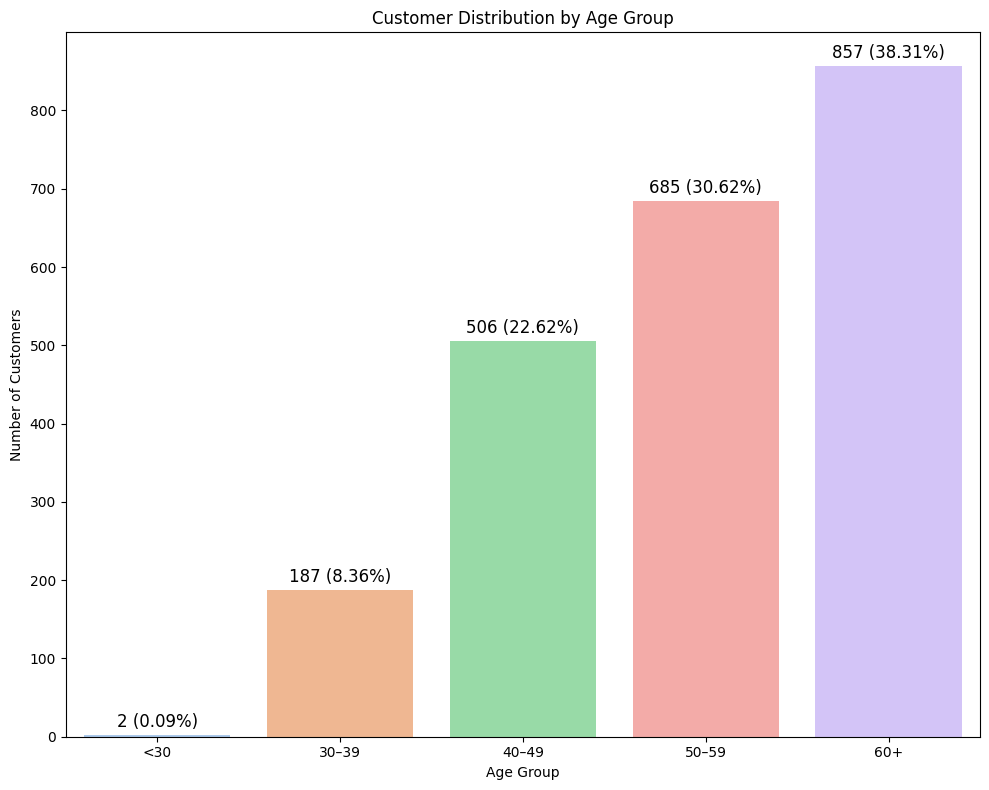

In [ ]:
# Counting the number or sum of each age group
age_counts = df_customer['Age_Group'].value_counts().sort_index()

# Barchart visualization of customer age groups
# Creating the barchart size and figure
plt.figure(figsize=(10,8))
ax = sns.barplot(x=age_counts.index, y=age_counts.values, palette='pastel')

# Adding 'sum' and 'percentage' labels inside the barchart
total = age_counts.sum()
for i, count in enumerate(age_counts):
    percentage = (count / total) * 100
    plt.text(i, count + 5, f'{count} ({percentage:.2f}%)', ha='center', va='bottom', fontsize=12)

# Adding titles for the barchart
plt.title("Customer Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

By looking at the barchart above, I can identify that:
- Only 2 customers aged below 30 years old (0,09%),
- 187 customers aged between 30 to 39 years old (8,36%),
- 506 customers aged between 40 to 49 years old (22,62%),
- 685 customers aged between 50 to 59 years old (30,62%),
- 857 customers aged more than 60 years old (38,31%).

**I also want to know customer's total spending when they shop in this particular grocery store. Therefore I'm going to create a new variable called Total_Spending.**

In [ ]:
df_customer['Total_Spending'] = df_customer[['MntWines', 'MntFruits', 'MntMeatProducts',
                                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [ ]:
# Show the proportion of customers based on their Total_Spending
df_customer["Total_Spending"].value_counts(normalize=True).mul(100).round(2).sort_index()

Total_Spending
5       0.04
6       0.09
8       0.18
9       0.09
10      0.22
        ... 
2352    0.04
2440    0.04
2486    0.04
2524    0.04
2525    0.09
Name: proportion, Length: 1054, dtype: float64

**There are also 2 variables that are connected which are Kidhome and Teenhome, how if I combine them by creating a new variable called Children?**

In [ ]:
# Add new variable called Children by combining variables Kidhome and Teenhome
df_customer['Children'] = df_customer['Kidhome'] + df_customer['Teenhome']

In [ ]:
# Current and updated dataset information
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-null   i

In [ ]:
df_customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age,Age_Group,Total_Spending,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,68,60+,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,71,60+,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,60,60+,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,41,40–49,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,44,40–49,422,1


For the next step, I'm going to check for any outliers from numerical variables using **boxplots and histplots** for visualization.

The numerical variables that I'm going to check are as following,
1. Income
2. Customer_Age
3. MntWines
4. MntFruits
5. MntMeatProducts
6. MntFishProducts
7. MntSweetProducts
8. MntGoldProds
9. NumWebPurchases
10. NumCatalogPurchases
11. NumStorePurchases
12. NumWebVisitsMonth
13. Recency
14. Total_Spending
15. Children

In [ ]:
# Relevant Numerical variables
numerical_variables = [
    'Income', 'Customer_Age',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency',
    'Total_Spending', 'Children'
]

# Relevant Categorical variables
categorical_variables = ['Education', 'Marital_Status', 'Age_Group']

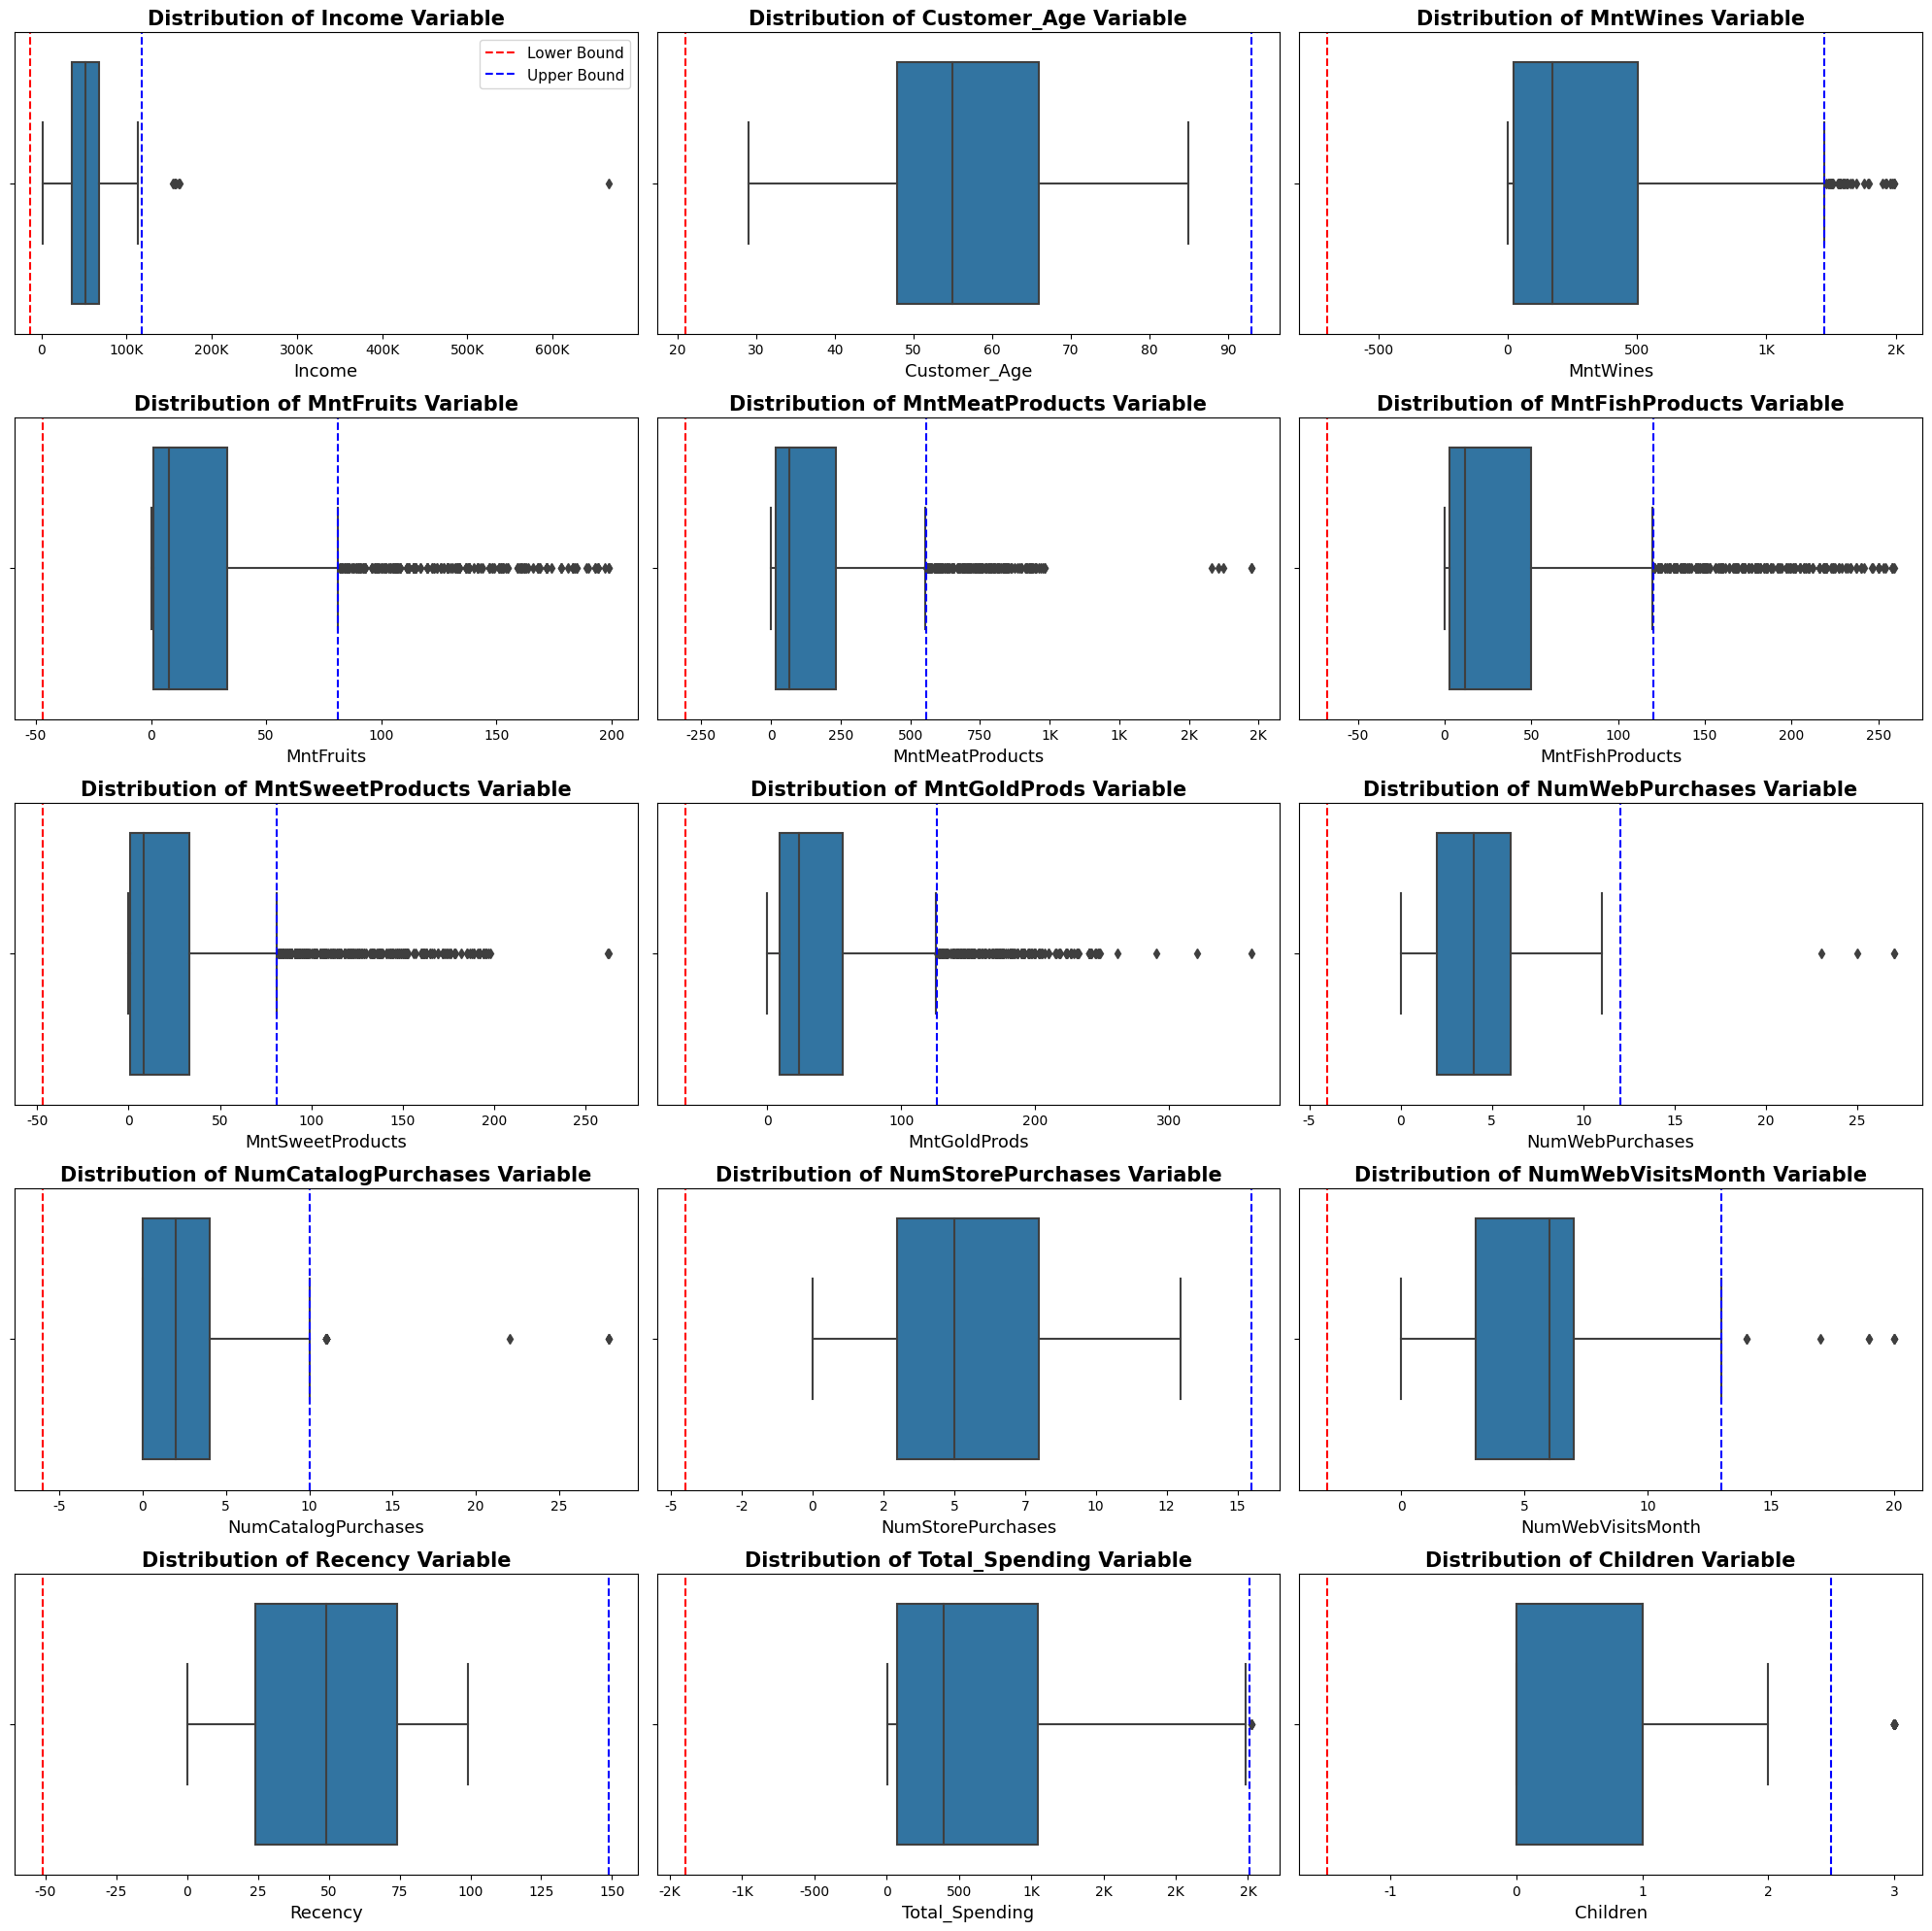

In [ ]:
# For better readability, I'm going to use K and M format for numerical figures
# For example: change 100,000 into 100k and 1,000,000 into 1M

# Function for K and M numerical formatting (including negative values)
def thousands_formatter(x, pos):
    abs_x = abs(x)
    if abs_x >= 1_000_000:
        formatted = f'{abs_x / 1_000_000:.0f}M'
    elif abs_x >= 1_000:
        formatted = f'{abs_x / 1_000:.0f}K'
    else:
        formatted = f'{int(abs_x)}'

    return f'-{formatted}' if x < 0 else formatted

formatter = FuncFormatter(thousands_formatter)

# List of Numerical variables
numerical_variables = ['Income', 'Customer_Age',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency',
    'Total_Spending', 'Children']

# Create and set up the boxplots' size (enlarged for better readability)
rows, cols = 5, 3 # (5 rows x 3 cols)
plt.figure(figsize=(20, 20))

# Loop through each feature to plot its boxplot
for i, col in enumerate(numerical_variables):
    ax = plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=df_customer, x=col, ax=ax)

    # Calculate IQR for outlier thresholds
    Q1 = df_customer[col].quantile(0.25)
    Q3 = df_customer[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Add vertical lines for outlier thresholds on the boxplot visualization
    ax.axvline(lower_bound, color="red", linestyle="--", label="Lower Bound")
    ax.axvline(upper_bound, color="blue", linestyle="--", label="Upper Bound")

    ax.set_title(f"Distribution of {col} Variable", fontsize=15, fontweight="bold")
    ax.set_xlabel(col, fontsize=13)
    ax.set_ylabel("")
    ax.xaxis.set_major_formatter(formatter)  # To make number formats more concise

    # Add legend only to first plot to avoid repetition
    if i == 0:
        ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

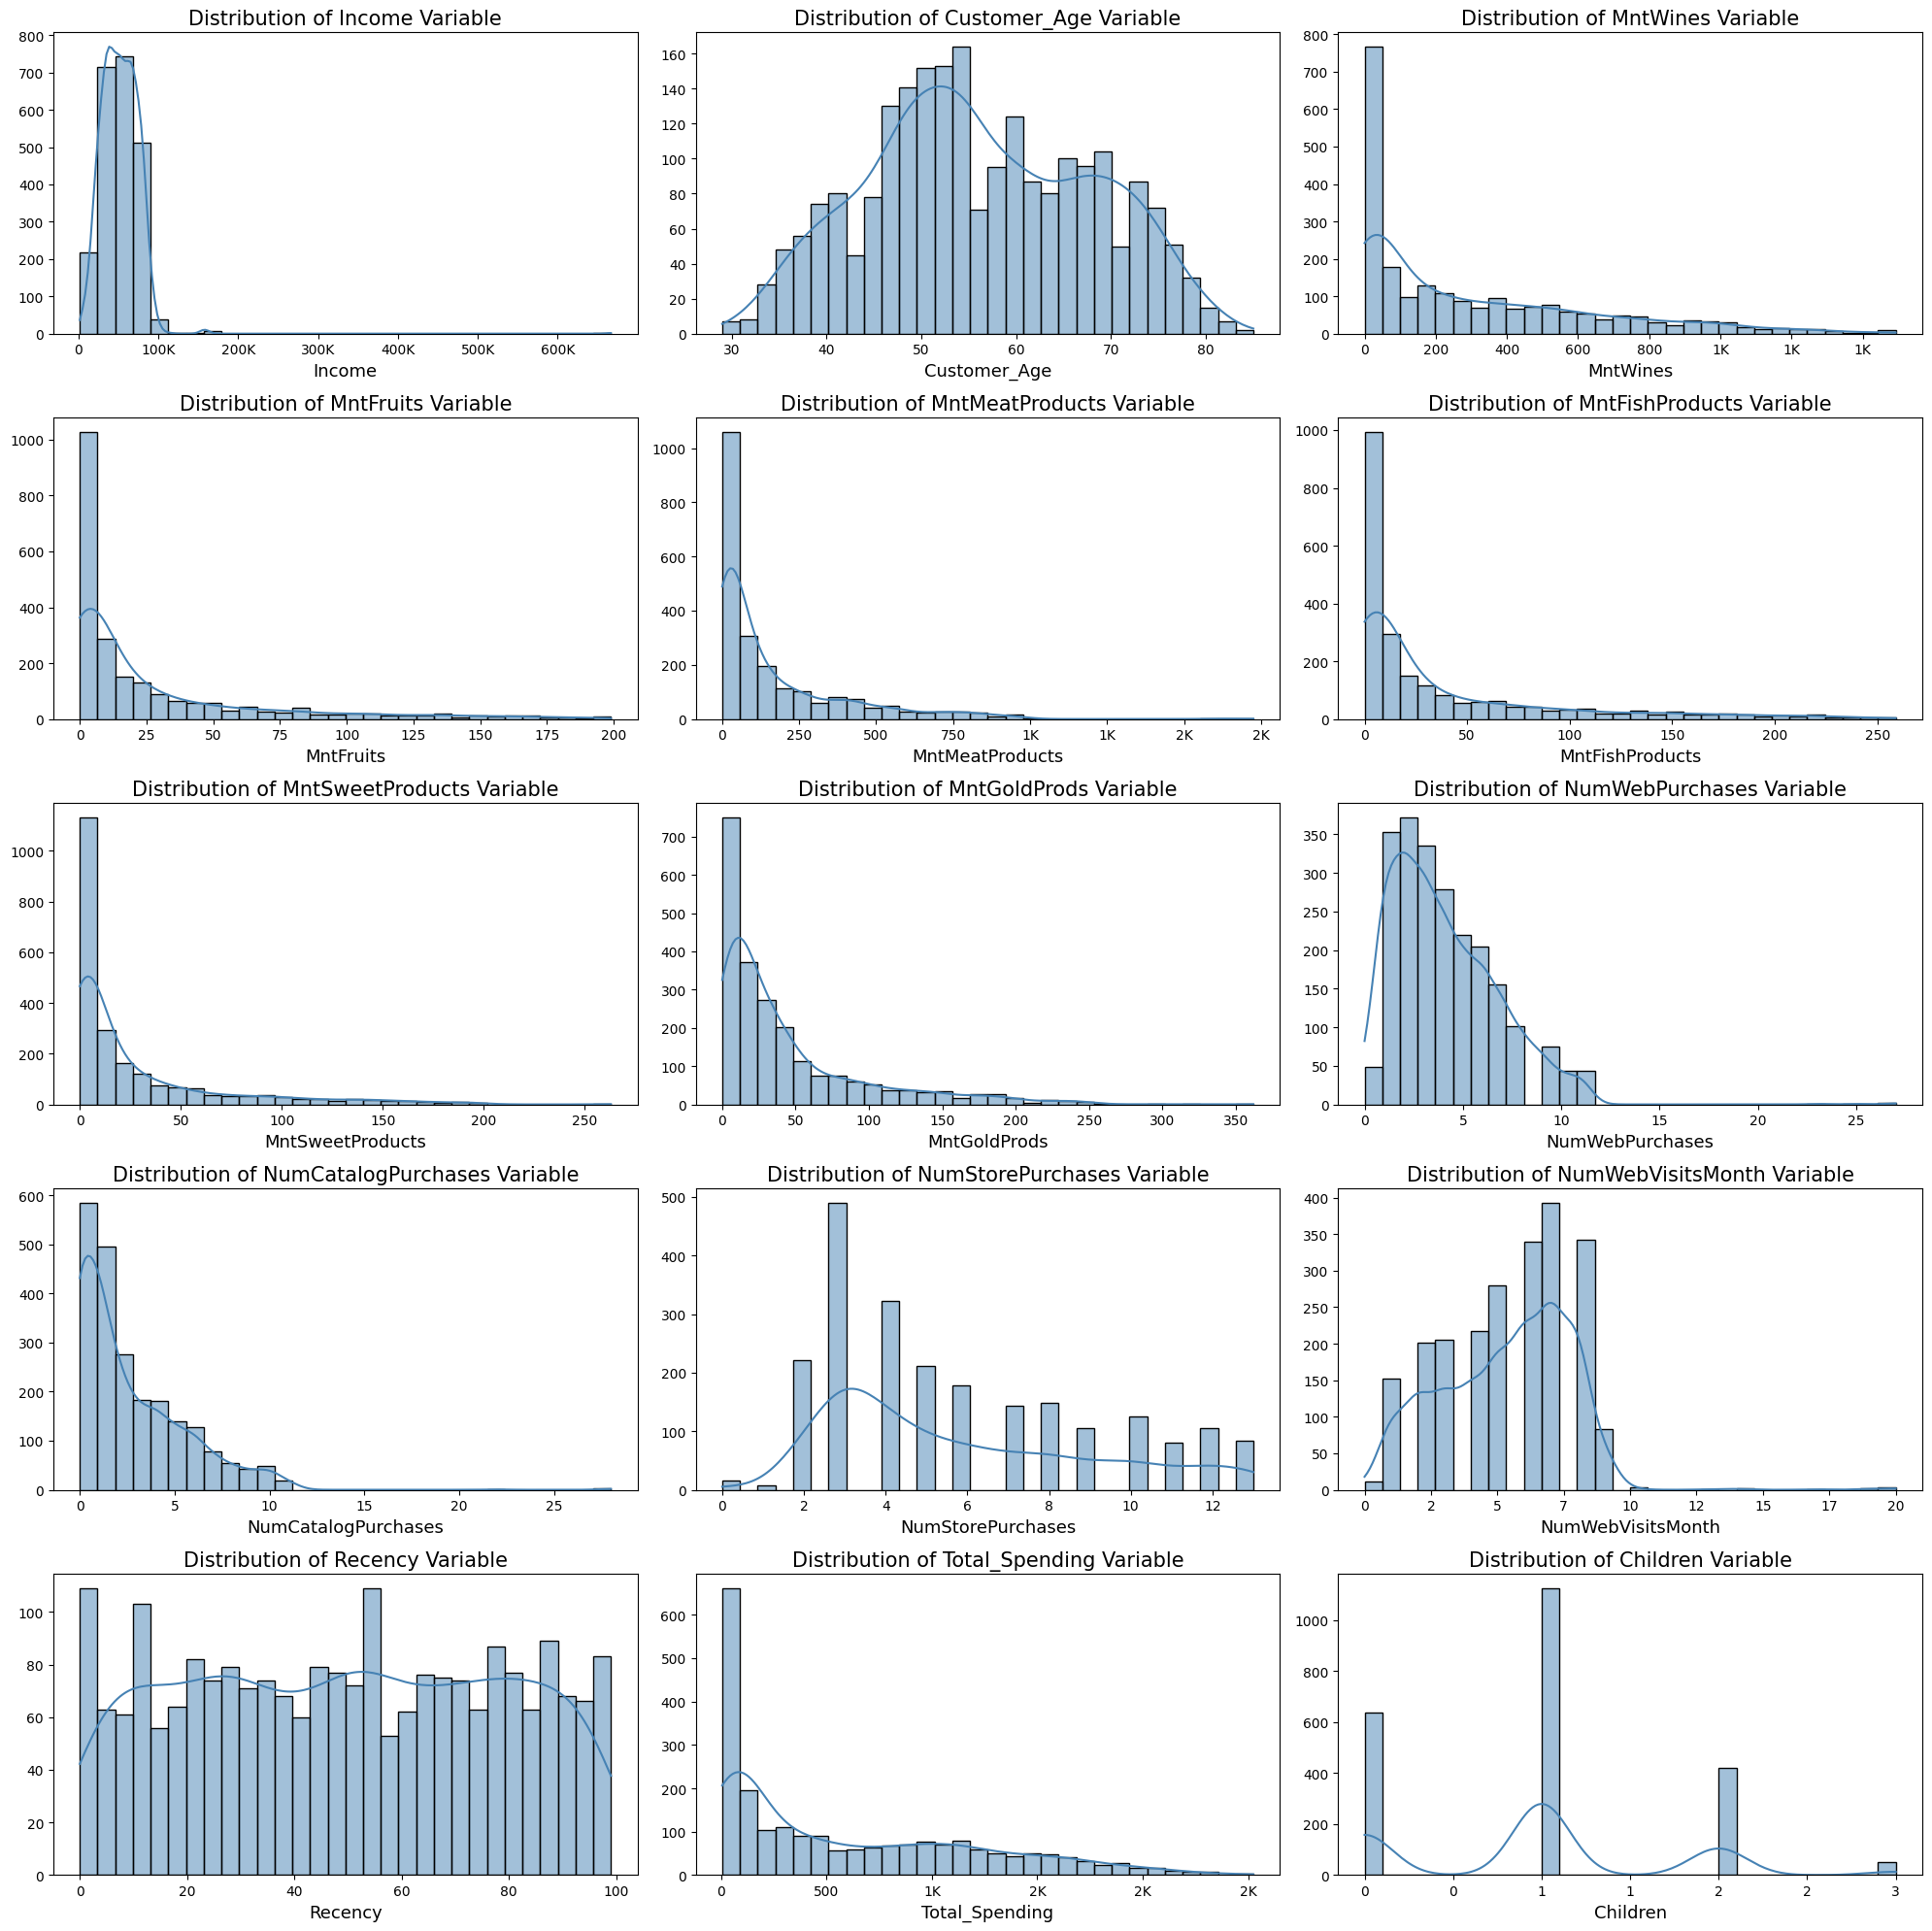

In [ ]:
# List of Numerical variables
numerical_features = ['Income', 'Customer_Age',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency',
    'Total_Spending', 'Children']

# Create and set up the histplots' size (enlarged for better readability)
rows, cols = 5, 3 # (5 rows x 3 cols)
plt.figure(figsize=(20, 20))

# Loop through each feature to plot its histogram
for i, col in enumerate(numerical_variables):
    ax = plt.subplot(rows, cols, i + 1)
    sns.histplot(data=df_customer, x=col, kde=True, bins=30, ax=ax, color='steelblue', edgecolor='black')

    ax.set_title(f'Distribution of {col} Variable', fontsize=15)
    ax.set_xlabel(col, fontsize=13)
    ax.set_ylabel('')
    ax.tick_params(axis='both', labelsize=10)

    # Apply formatter to show large numbers in K and M format
    # For example: change 100,000 into 100k and 1,000,000 into 1M
    ax.xaxis.set_major_formatter(formatter)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

I have created boxplots and histplots for chosen variables/columns to identify any outliers.

To make outliers easier to identify, I'm going to calculate the outliers percentage of those relevant numerical variables using IQR method (interquantile range).

In [ ]:
# First, we set which columns that will be checked for outliers' percentage
columns_to_check = [
    'Income', 'Customer_Age', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Recency', 'Total_Spending', 'Children'
]

# The function to calculate the outliers percentage of selected variables
def calculate_outlier_percentage(df_customer, columns):
    outlier_data = []
    for col in columns:
        Q1 = df_customer[col].quantile(0.25)
        Q3 = df_customer[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_customer[(df_customer[col] < lower_bound) | (df_customer[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_percentage = (outlier_count / len(df_customer)) * 100
        outlier_data.append({
            'Variable': col,
            'Outlier Count': outlier_count,
            'Outlier Percentage (%)': round(outlier_percentage, 2)
        })
    return pd.DataFrame(outlier_data)

# Showing the results of previous calculation
outlier_stats = calculate_outlier_percentage(df_customer, columns_to_check)
print(outlier_stats)

               Variable  Outlier Count  Outlier Percentage (%)
0                Income              8                    0.36
1          Customer_Age              0                    0.00
2              MntWines             35                    1.56
3             MntFruits            226                   10.10
4       MntMeatProducts            174                    7.78
5       MntFishProducts            223                    9.97
6      MntSweetProducts            248                   11.09
7          MntGoldProds            206                    9.21
8       NumWebPurchases              4                    0.18
9   NumCatalogPurchases             23                    1.03
10    NumStorePurchases              0                    0.00
11    NumWebVisitsMonth              8                    0.36
12              Recency              0                    0.00
13       Total_Spending              3                    0.13
14             Children             53                 

Based on the outliers calculation above, I was thinking to **remove values/rows** from variables/columns with **outliers percentage >5% using IQR method (interquantile range)**.

Buf if I have done that, I'll be dropping 1,077 rows from the remaining 2,237 rows, which is around 48%.

Therefore, I decided to try **Winsorization (outliers transformation)** technique for variables with outliers percentage >5%.

The variables that will be filtered with Winsorization technique are as following,
1. **MntFruits**
2. **MntMeatProducts**
3. **MntFishProducts**
4. **MntSweetProducts**
5. **MntGoldProds**

**Winsorization** is a technique to handle outliers (extreme values) by replacing the most the most extreme values with less extreme ones.

- **Example**: If my dataset has values like [1, 2, 3, 100], Winsorization might change the 100 to 10 as a predefined limit.

- **Goal**: Keep the data realistic while reducing the impact of extreme values.

In [ ]:
# Variables that have more than 5% of outliers inside them
variables_to_filter = [
    'MntFruits',
    'MntMeatProducts',
    'MntSweetProducts',
    'MntFishProducts',
    'MntGoldProds'
]

# Winsorization function (replacing extreme values with less extreme ones)
def winsorize_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply Winsorization function to selected variables/columns
for col in variables_to_filter:
    winsorize_outliers(df_customer, col)

In [ ]:
# Double check the outliers to see if Winsorization technique works or not
for col in variables_to_filter:
    Q1 = df_customer[col].quantile(0.25)
    Q3 = df_customer[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    below_lower_bound = (df_customer[col] < lower_bound).sum()
    above_upper_bound = (df_customer[col] > upper_bound).sum()

    # If the results for both below and upper are 0, then the technique worked
    print(f"{col}: Below lower bound = {below_lower_bound}, Above upper bound = {above_upper_bound}")

MntFruits: Below lower bound = 0, Above upper bound = 0
MntMeatProducts: Below lower bound = 0, Above upper bound = 0
MntSweetProducts: Below lower bound = 0, Above upper bound = 0
MntFishProducts: Below lower bound = 0, Above upper bound = 0
MntGoldProds: Below lower bound = 0, Above upper bound = 0


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   float64       
 13  MntSweetProducts     2237 non-null   i

After I applied Winsorization technique to outliers inside selected variables, I'd like to drop some variables/columns that I won't be using for data analysis and clustering. They are as following,
1. ID
2. Z_CostContact
3. Z_Revenue
4. Kidhome
5. Teenhome

In [ ]:
print(df_customer.columns.tolist())

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Customer_Age', 'Age_Group', 'Total_Spending', 'Children']


In [ ]:
# Dropping variables/columns that are no longer needed (irrelevant)
columns_to_drop = ['ID', 'Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome']
df_customer.drop(columns=columns_to_drop, axis=1, inplace=True)

In [ ]:
# Copy the cleaned and processed dataframe to a new one
df_customer_filtered = df_customer.copy()

In [ ]:
df_customer_filtered.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Customer_Age', 'Age_Group', 'Total_Spending',
       'Children'],
      dtype='object')

In [ ]:
df_customer_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2237 non-null   int64         
 1   Education            2237 non-null   object        
 2   Marital_Status       2237 non-null   object        
 3   Income               2237 non-null   float64       
 4   Dt_Customer          2237 non-null   datetime64[ns]
 5   Recency              2237 non-null   int64         
 6   MntWines             2237 non-null   int64         
 7   MntFruits            2237 non-null   int64         
 8   MntMeatProducts      2237 non-null   int64         
 9   MntFishProducts      2237 non-null   float64       
 10  MntSweetProducts     2237 non-null   int64         
 11  MntGoldProds         2237 non-null   float64       
 12  NumDealsPurchases    2237 non-null   int64         
 13  NumWebPurchases      2237 non-null   i

In [ ]:
df_customer_filtered.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,Age_Group,Total_Spending,Children
0,1957,Graduation,Single,58138.0,2012-09-04,58,635,81,546,120.5,...,0,0,0,0,0,1,68,60+,1617,0
1,1954,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2.0,...,0,0,0,0,0,0,71,60+,27,2
2,1965,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111.0,...,0,0,0,0,0,0,60,60+,776,0
3,1984,Graduation,Together,26646.0,2014-02-10,26,11,4,20,10.0,...,0,0,0,0,0,0,41,40–49,53,1
4,1981,PhD,Married,58293.0,2014-01-19,94,173,43,118,46.0,...,0,0,0,0,0,0,44,40–49,422,1


Before I proceed to the next steps, I'm going to divide the data clustering analysis into 2 parts, such as:

**A. Clustering based on Age_Group and Products.**

**B. Clustering based on Age_Group and Purchasing Channels.**

## IV. DATA MANIPULATION

**A. Clustering based on Age_Group and Products**

Right now, I'm going to select some variables for the 1st part of my clustering process. I will do clustering between Age_Groups and types of purchased products. The selected variables are as following,
1. Age_Group
2. MntWines
3. MntFruits
4. MntMeatProducts
5. MntFishProducts
6. MntSweetProducts
7. MntGoldProds

**My objective for this clustering is to explore and identify how different age groups spend on various types of products. This helps identify age-related purchasing patterns and preferences.**

I will use the KMeans method for clustering, and apply PCA, scatter plots, and heatmaps for visualization.

**In this part, I'm also going to encode relevant Categorical Variables and standardize relevant Numerical Variables according to the goal of the clustering, which is a part of Data Manipulation.**

After that, I will proceed to do Modelling Preparation for unsupervised machine learning model which is clustering.

In [ ]:
# The selected variables for clustering A: Age_Group and Product
cluster_a_df = df_customer_filtered[['Age_Group', 'MntWines', 'MntFruits', 'MntMeatProducts',
                                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [ ]:
# Viewing unique values and calculating the sum of values of each Products

summary = pd.DataFrame()

for col in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
    counts = df_customer_filtered[col].value_counts().sort_index()
    summary = pd.concat([summary, counts], axis=1)

summary.columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
print(summary)

       MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0.0        13.0      399.0              1.0            384.0   
1.0        37.0      162.0             14.0             10.0   
2.0        42.0      120.0             30.0            156.0   
3.0        30.0      116.0             40.0            130.0   
4.0        33.0      104.0             30.0            108.0   
...         ...        ...              ...              ...   
540.0       NaN        NaN              1.0              NaN   
549.0       NaN        NaN              2.0              NaN   
550.0       NaN        NaN              1.0              NaN   
120.5       NaN        NaN              NaN            223.0   
126.5       NaN        NaN              NaN              NaN   

       MntSweetProducts  MntGoldProds  
0.0               418.0          61.0  
1.0               161.0          73.0  
2.0               128.0          61.0  
3.0               101.0          69.0  
4.0                81.0        

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [ ]:
# Since Age_Group is a categorical variable, I must change them info numbers
# Python can only 'read' number variables, not categorical variables
# Therefore, I will transform Age_Group into numbers by encoding its values

# Encode Age_Group in df_customer_filtered dataset
le = LabelEncoder()
df_customer_filtered['Age_Group_Encoded'] = le.fit_transform(df_customer_filtered['Age_Group'])

# Since I have the encoded version of Age_Group which is Age_Group_Encoded, then I'm going to revise the selected variables for clustering
cluster_a_df = df_customer_filtered[['Age_Group_Encoded', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# PS: do not drop the original Age_Group variable from cluster_a_df and df_customer_filtered datasets

In [ ]:
# Next I'm go to standardise cluster_a_df
scaler = StandardScaler()
cluster_a_scaled = scaler.fit_transform(cluster_a_df)

## V. MODEL PREPARATION FOR PART A

**This model preparation of for part A. Clustering based on Age_Group and Products.**

Now I'm going to utilize **Elbow Method** to define and decide the **cluster numbers** to be tested for **cluster_a_df**.

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

Number of clusters: 1 → WCSS/Inertia: 15659.00
Number of clusters: 2 → WCSS/Inertia: 8800.84
Number of clusters: 3 → WCSS/Inertia: 7593.62
Number of clusters: 4 → WCSS/Inertia: 6690.27
Number of clusters: 5 → WCSS/Inertia: 6119.06
Number of clusters: 6 → WCSS/Inertia: 5648.55
Number of clusters: 7 → WCSS/Inertia: 5297.88
Number of clusters: 8 → WCSS/Inertia: 5053.43
Number of clusters: 9 → WCSS/Inertia: 4810.09
Number of clusters: 10 → WCSS/Inertia: 4643.96


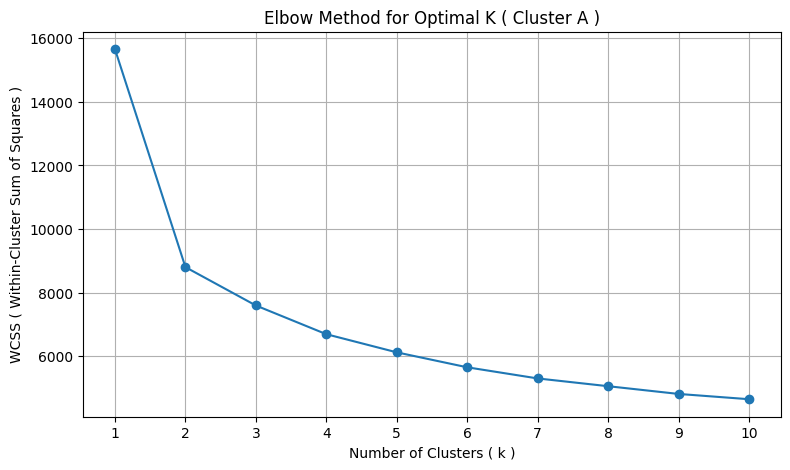

In [ ]:
# 1. WCSS Calculation & Elbow Method Visualization

# Define the range of cluster numbers to test (example: from 1 to 10)
wcss = []  # (Within-Cluster Sum of Squares)

# Run KMeans for k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_a_scaled)
    wcss.append(kmeans.inertia_) # inertia_ represents total WCSS for this model

# Print each n_clusters score
for i, score in enumerate(wcss):
    print(f"Number of clusters: {i+1} → WCSS/Inertia: {score:.2f}")

# Elbow curve visualization
plt.figure(figsize=(9, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K ( Cluster A )')
plt.xlabel('Number of Clusters ( k )')
plt.ylabel('WCSS ( Within-Cluster Sum of Squares )')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
# Count the no. of values of each group inside Age_Group_Encoded
df_customer_filtered['Age_Group_Encoded'].value_counts().sort_index()

Age_Group_Encoded
0    187
1    506
2    685
3    857
4      2
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

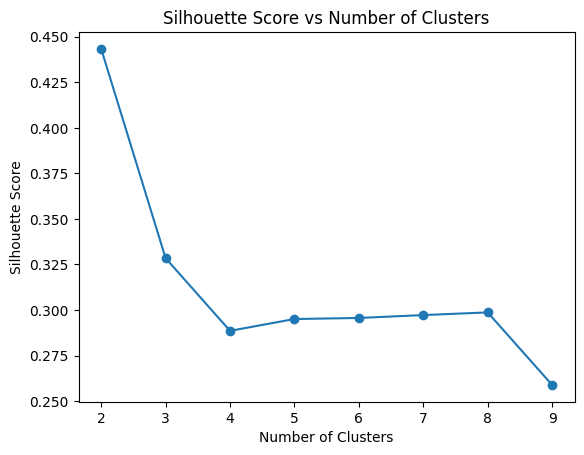

In [ ]:
# The visualization of Silhouette Score based on the number of n_clusters
scores = []
ks = range(2, 10)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(cluster_a_scaled)
    scores.append(silhouette_score(cluster_a_scaled, preds))

plt.plot(ks, scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Showing the Silhouette Score based on the no. of clusters
print("Silhouette Score:")
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(cluster_a_scaled)
    score = silhouette_score(cluster_a_scaled, preds)
    print(f"n_clusters = {k}, silhouette_score = {score:.4f}")

Silhouette Score:
n_clusters = 2, silhouette_score = 0.4433


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 3, silhouette_score = 0.3285
n_clusters = 4, silhouette_score = 0.2886


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 5, silhouette_score = 0.2951
n_clusters = 6, silhouette_score = 0.2957


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 7, silhouette_score = 0.2972
n_clusters = 8, silhouette_score = 0.2987


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 9, silhouette_score = 0.2589


Based on the WCSS/Inertia score, Elbow Curve, Silhouette Score and the types of unique values of Age_Group_Encoded, **I decide to use 5 for n_clusters** to finalize my clustering process with KMeans method.

In other words, the selection of 5 clusters was not only guided by the Elbow Curve (which shows a noticeable flattening of WCSS starting around the 5th point), but also based on the predefined age segmentation (Age_Group), which consists of 5 values:
1. <30.
2. 30–39.
3. 40–49.
4. 50–59.
5. 60+.

In [ ]:
# Dimension check and final clustering preparation before KMeans visualization process
# Like I mentioned before, the choice of n_clusters=5 is because of the number of age groups which are 5 groups
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(cluster_a_scaled)

# Add cluster results to the original DataFrame
cluster_a_df['Cluster'] = clusters

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_13/1584516784.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_a_df['Cluster'] = clusters


## VI. MODEL EVALUATION FOR PART A

Since I have done the clustering preparation above, I'm going to calculate the **SILHOUETTE SCORE** of the model before visualization process takes place.

**This model evaluation is for part A. Clustering based on Age_Group and Products.**

In [ ]:
# Evaluate clustering quality using Silhouette Score
silhouette_avg = silhouette_score(cluster_a_scaled, clusters)
print(f"Silhouette Score for KMeans clustering (n=5) of Part A: {silhouette_avg:.4f}")

Silhouette Score for KMeans clustering (n=5) of Part A: 0.2951


The Silhouette Score of KMeans clustering with n=5 for Part A. Clustering based on Age_Group and Products is 0.2951, therefore it falls under the category **weak but acceptable cluster structure**.

This score suggests that the  while some level of cluster separation exists, there is also a significant degree of overlap between clusters. It indicates the boundaries between clusters are not sharply defined.

However, this is not necessarily a bad result, especially if:
- The original dataset (df_customer) contains similar purchasing behavior across different Age_Group, making separation naturally challenging.
- I deliberately chose 5 clusters based on business logic, such as the Age_Group with 5 segments.

Despite the relatively low Silhouette Score, the clustering outcome remains interpretable and aligned with the context, which can provide insights for customer purchasing begavior analysis.


Right now I'm going to try KMeans visualization using PCA method and scatter plot.

The objective is to check the clustering results based on **Age_Group (and Age_Group_Encoded) against various products** and to identify the most favorite products based on each group.

/tmp/ipykernel_13/1938572777.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_customer_filtered['Age_Group'] = df_customer_filtered['Age_Group'].replace({


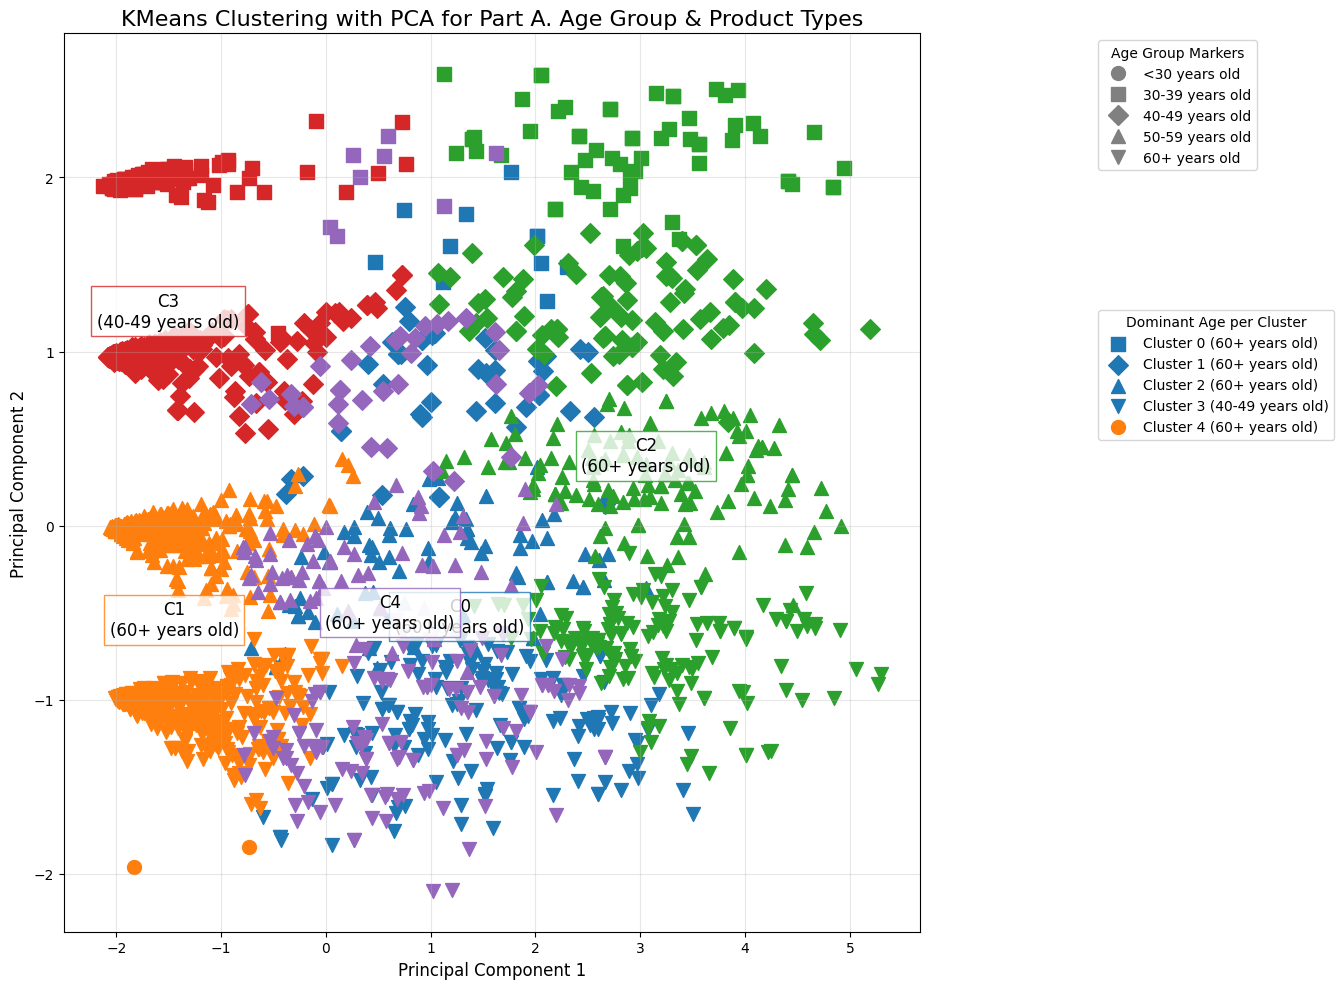

In [ ]:
# Final PCA Visualization for clustering based on Age Group & Products

# 1) Standardize Index for alignment
df_customer_filtered = df_customer_filtered.reset_index(drop=True)

# Normalize Age_Group labels
df_customer_filtered['Age_Group'] = df_customer_filtered['Age_Group'].replace({
    '<30': '<30 years old',
    '30–39': '30-39 years old',
    '40–49': '40-49 years old',
    '50–59': '50-59 years old',
    '60+': '60+ years old'})

# 2) PCA Transformation into 2D
pca = PCA(n_components=2)
cluster_pca_a = pca.fit_transform(cluster_a_scaled)

# 3) Create the DataFrame for plotting on the scatter plot
pca_df_a = pd.DataFrame(data=cluster_pca_a, columns=['PCA1', 'PCA2'])
pca_df_a['Cluster'] = kmeans.labels_

# Do make sure the Age_Group values are aligned
pca_df_a['Age_Group'] = df_customer_filtered['Age_Group'].values

# 4) Define and assign custom marker per Age_Group
age_markers = {
    '<30 years old': 'o', # Circle
    '30-39 years old': 's', # Square
    '40-49 years old': 'D', # Diamond
    '50-59 years old': '^', # Triangle up
    '60+ years old': 'v' # Triangle down
}
pca_df_a['Age_Marker'] = pca_df_a['Age_Group'].map(age_markers)

# 5) Dominant Age Group per Cluster
dominant_age_per_cluster_a = pca_df_a.groupby('Cluster')['Age_Group'].agg(lambda x: x.mode()[0]).to_dict()

# 6) Visualization
plt.figure(figsize=(14, 10))

# Plotting by cluster and Age_Group
for cluster in sorted(pca_df_a['Cluster'].unique()):
    for age_group, marker in age_markers.items():
        subset = pca_df_a[(pca_df_a['Cluster'] == cluster) & (pca_df_a['Age_Group'] == age_group)]
        if not subset.empty:
            plt.scatter(subset['PCA1'], subset['PCA2'],
                        s=100,
                        c=f'C{cluster}',
                        marker=marker,
                        label=f'Cluster {cluster} - {age_group}' if cluster == 0 else "")

# Cluster centroids
cluster_centers_pca_a = pca.transform(kmeans.cluster_centers_)
for i, (x, y) in enumerate(cluster_centers_pca_a):
    plt.text(x, y, f'C{i}\n({dominant_age_per_cluster_a[i]})',
             fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor=f'C{i}'))

# Showing Age_Group marker legends
handles = [plt.Line2D([0], [0], marker=m, color='gray', linestyle='None', markersize=10, label=ag)
           for ag, m in age_markers.items()]
legend1 = plt.legend(handles=handles, title="Age Group Markers", bbox_to_anchor=(1.2, 1), loc='upper left')

# Showing Cluster legend
legend2 = plt.legend([f'Cluster {c} ({dominant_age_per_cluster_a[c]})' for c in sorted(dominant_age_per_cluster_a.keys())],
                     title="Dominant Age per Cluster", bbox_to_anchor=(1.2, 0.7), loc='upper left')
plt.gca().add_artist(legend1)

plt.title('KMeans Clustering with PCA for Part A. Age Group & Product Types', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Age_Group distribution per cluster
print("\nAge Group Distribution per Cluster:")
print(pd.crosstab(pca_df_a['Cluster'], pca_df_a['Age_Group'], normalize='index').round(2))

# Number of data points per cluster
print("\nNumber of people per Cluster:")
print(pca_df_a['Cluster'].value_counts().sort_index())

# Below is the calculation of the no. of people in each cluster


Age Group Distribution per Cluster:
Age_Group  <30 years old  30-39 years old  40-49 years old  50-59 years old  \
Cluster                                                                       
0                    0.0             0.04             0.15             0.26   
1                    0.0             0.00             0.00             0.50   
2                    0.0             0.14             0.21             0.29   
3                    0.0             0.24             0.76             0.00   
4                    0.0             0.03             0.15             0.29   

Age_Group  60+ years old  
Cluster                   
0                   0.56  
1                   0.50  
2                   0.35  
3                   0.00  
4                   0.52  

Number of people per Cluster:
Cluster
0    296
1    830
2    438
3    440
4    233
Name: count, dtype: int64


**Below is the average purchasing value of products based ONLY on Cluster.**

**The figures below explain the profile of each Cluster in terms of average spending amount based on types of product regardless of customers' Age_Group.**

In [ ]:
# Combining the Cluster data above with the filtered Products variables
cluster_spending = pd.DataFrame({
    'Cluster': kmeans.labels_,
    'MntWines': df_customer_filtered['MntWines'],
    'MntFruits': df_customer_filtered['MntFruits'],
    'MntMeatProducts': df_customer_filtered['MntMeatProducts'],
    'MntFishProducts': df_customer_filtered['MntFishProducts'],
    'MntSweetProducts': df_customer_filtered['MntSweetProducts'],
    'MntGoldProds': df_customer_filtered['MntGoldProds']
})

# Calculating the average purchasing of products for each Cluster
cluster_average_spending = cluster_spending.groupby('Cluster').mean()
pd.set_option('display.float_format', '{:.2f}'.format)
print(cluster_average_spending)

# Below is the average purchasing value of products based on each cluster

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                          
0          756.37      30.04           297.79            50.71   
1          116.49       5.27            36.00             7.40   
2          533.21      62.92           383.74            91.33   
3           59.52       7.05            36.43             9.57   
4          428.02      19.54           151.32            27.69   

         MntSweetProducts  MntGoldProds  
Cluster                                  
0                   30.71         34.60  
1                    5.33         16.21  
2                   63.21         76.11  
3                    6.85         15.68  
4                   20.85        104.59  


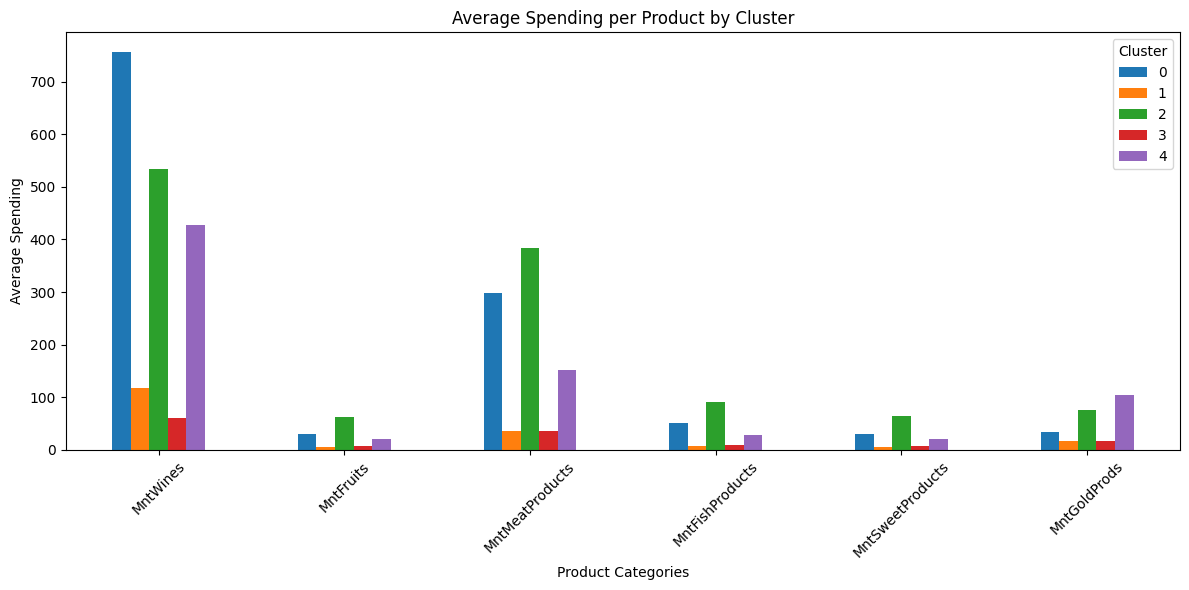

In [ ]:
# Visualization of each Cluster's average spending on Products
# The visualization is only based on Cluster, regardless of each Age_Group
cluster_average_spending = cluster_spending.groupby('Cluster').mean()

# Bar Chart Plot
cluster_average_spending.T.plot(kind='bar', figsize=(12, 6))

# Display format setting
plt.title('Average Spending per Product by Cluster')
plt.xlabel('Product Categories')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

**Below is the average purchasing value of products based on Age_Group inside each Cluster.**

**The figures below explain the profile of each Age_Group in terms of average spending amount based on types of product in each Cluster.**

In [ ]:
# Combining and adding Age_Group column into the cluster_results data frame
cluster_spending['Age_Group'] = df_customer_filtered['Age_Group']

# Grouping and calculating average spending on Products per Age_Group and Cluster
insight = cluster_spending.groupby(['Cluster', 'Age_Group']).mean()
pd.set_option('display.float_format', '{:.2f}'.format)
print(insight)

# Below is the average purchasing value of products based on each Cluster AND Age Group

                         MntWines  MntFruits  MntMeatProducts  \
Cluster Age_Group                                               
0       <30 years old         NaN        NaN              NaN   
        30-39 years old    967.91      15.27           401.18   
        40-49 years old    781.60      28.00           320.72   
        50-59 years old    774.48      24.86           268.71   
        60+ years old      727.24      33.98           298.49   
1       <30 years old        1.50       9.00             8.00   
        30-39 years old       NaN        NaN              NaN   
        40-49 years old       NaN        NaN              NaN   
        50-59 years old     89.58       4.93            33.26   
        60+ years old      143.70       5.58            38.84   
2       <30 years old         NaN        NaN              NaN   
        30-39 years old    568.28      60.03           453.08   
        40-49 years old    501.47      61.33           359.68   
        50-59 years old  

/tmp/ipykernel_13/547736696.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  insight = cluster_spending.groupby(['Cluster', 'Age_Group']).mean()


I have finished the clustering process using KMeans along with its vizualization using PCA and Seaborn scatter plot.

I'm going to use heatmap plot to visualize shopping/purchasing pattern based on customer's Age_Group and Products.

/tmp/ipykernel_13/1857744687.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_summary = heatmap_customer_df_a.groupby('Age_Group')[['MntWines', 'MntFruits',


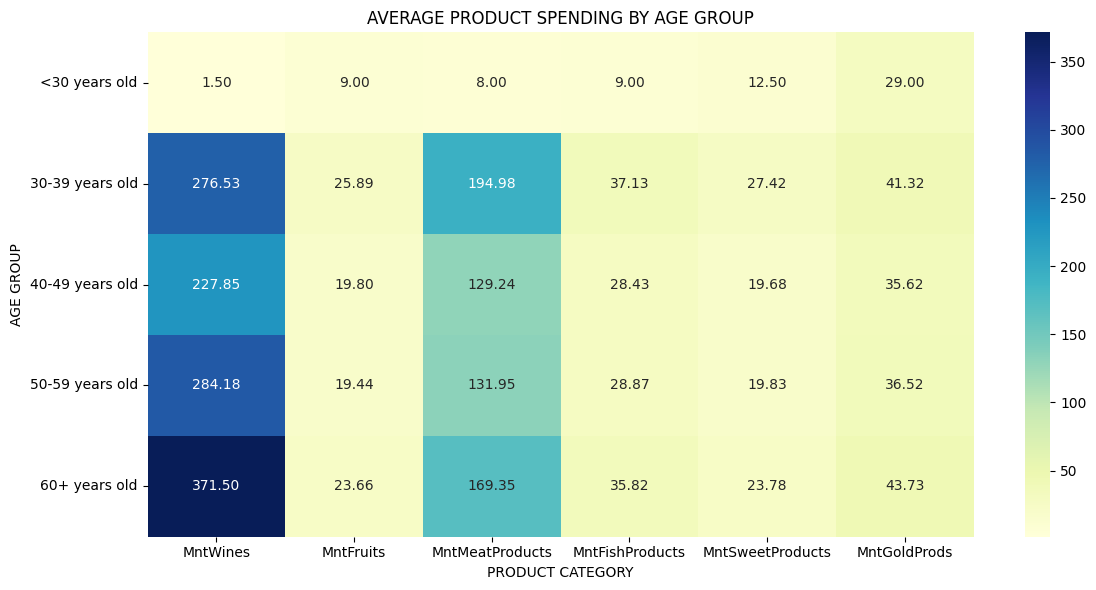

In [ ]:
# Make a copy of the customer DataFrame
heatmap_customer_df_a = df_customer_filtered.copy()

# Group by Age_Group and calculate mean spending for each product
group_summary = heatmap_customer_df_a.groupby('Age_Group')[['MntWines', 'MntFruits',
                                                  'MntMeatProducts', 'MntFishProducts',
                                                  'MntSweetProducts', 'MntGoldProds']].mean()

# Create a heatmap to show average product spending per Age_Group
plt.figure(figsize=(12, 6))
sns.heatmap(group_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("AVERAGE PRODUCT SPENDING BY AGE GROUP")
plt.xlabel("PRODUCT CATEGORY")
plt.ylabel("AGE GROUP")
plt.tight_layout()
plt.show()

From the average product spending heatmap above, we can get some information as following,

1. Senior customers aged 60+ years old spend the most on MntWines (#1), MntMeatProducts (#2) and MntGoldProds (#3).
2. Customers aged between 40-49 years old, 50-59 years old and 30-39 years old like to purchase MntWines (#1), MntMeatProducts (#2) and MntGoldProds (#3) just like the senior ones.
3. As for younger customers aged < 30 years old, they prefer to spend on MntGoldProds. They're probably started on collecting long term secure investment.

The summary of part **A. Clustering based on Age_Group and Products**.

I. We have different clusters of customers such as,

1. **Senior customers with high-spending habits** (cluster 0 & 4)

a. Age group:
- 40-49 years old (15% in cluster 0 and 15% in cluster 4).
- 50-59 years old (26% in cluster 0 and 29% in cluster 4).
- 60+ years old (56% in cluster 0 and 52% in cluster 4).

b. Key products:
- Wine or MntWines, high spending/purchases in cluster 0 and 4.
- Gold Products or MntGoldProds in cluster 0 and 4.

c. Insight and action:
i. Insight: Senior customers are attracted to luxury products (wine and gold).
ii. Action:
- Create "Wine & Gold" product bundles for gifts (e.g. retirement gifts).
- Create loyalty programs for high net worth customers (e.g. points acquired can be redeemed with 5-star hotel voucher for 1-2 nights).

2. **Budget-conscious senior customers** (cluster 1)

a. Age group:
- 50% aged 50-59 years old.
- 50% aged 60+ years old.

b. Key products: evenly distributed purchases with low spending values except for wine, they still like to buy wine (MntWines) from time to time.

c. Insight and action:
i. Insight: They are price-sensitive & have minimal spending, except for wine.
ii. Action:
- Offer bulk discounts on food products (fruits, meat, fish, and sweet), e.g. buy 5 meat products to get 15% off,
- Promote budget/cheap wine options, e.g. house brands.

3. **Health-focused middle-aged customers** (cluster 2)

a. Age group:
- 21% aged 40-49 years old.
- 29% aged 50-59 years old.
- 35% aged 60+ years old.

b. Key products: They often buy fresh food products such as,
- Fruits (MntFruits).
- Fish (MntFishProducts).

c. Insight and action:

i. Insight: They prioritize buying fresh food products.

ii. Action:
- Partnering with fitness apps for cross promotions programs.
- Create and promote "Healthy Meal Kits" with affordable price.

4. **Mixed-aged balanced customers** (cluster 3)

a. Age group:
- 24% aged 30-39 years old.
- 76% aged 40-49 years old.

b. Key products:
- Meat (MntMeatProducts).
- Wine (MntWines).

c. Insight and action:

i. Insight: They are cross generation or family oriented with mostly middle-aged customers.

ii. Action:
- Promote meat and wine combos as "Family BBQ Kits" (some of them might have children).
- Limited time holidays or weekend flash sale.

5. **Young spenders**

a. Findings:
- Only 1 customer aged <30 years old in cluster 1, but on average only spent $1.50 on wine (MntWines).
- Only a small number of customers aged 30-39 years old,

i. 4% in cluster 0.

ii. 0% in cluster 1.

iii. 14% in cluster 2.

iv. 24% in cluster 3.

v. 3% in cluster 4.

b. Based on the original dataset (df_customer) there are only a small number of customers aged between 30-39 years old and below 30 years old.

c. Therefore they are underrepresented on the scatter plot, which is dominated by middle-aged, older and senior customers even though the younger customers aged <40 years old have potential buying power.

d. I suggest the grocery store to investigate this segment further with,
- Directly targeted surveys on site or creating in-app polls, assuming the store has its own app.
- Create a membership club/group targeting younger customers who like to consume wine regularly.
- Promoting products using the store's social media and app.

The information regarding spending habits of these customers are reinforced by the heatmap above, which contains the average spending of each Age_Group of customers on Product Categories.

II. Other than short-term actions above, I also have medium to long-term strategic recommendations as following,

1. Promotions for specific segments:
- Hold wine tasting sessions for high net worth individuals (cluster 0 and 4).
- Sell discounted fruit basket for health-focused customers (cluster 2).

2. Product development:
- Develop and sell various ready-to-cook healthy meal kits for health-focused customers (cluster 2).

3. Marketing and promotion channel:
- Print flyers and TV ads for older and senior customers (cluster 0, 1, and 4).
- Utilize social media for middle-aged and especially to attract more younger customers.

4. Inventory planning:
- Stock more wine in store to cater older and senior customers.
- Increase fresh food products to cater customers of cluster 2.

III. Based on the original dataset, the grocery store's current customer database is mostly consists of older, wine consumer demographics with considerable health-focused middle age customers. The firm should prioritize high-value senior customers and find ways to attract younger customers to survive and stay profitable in the future.

This is my takeaway for part **A. Clustering based on Age_Group and Products**. Now, I'm going to explore other ways to identify customers'purchasing behavior by grouping and clustering other variables.

For the 2nd part of Customer Purchasing Behavior Analysis, I'd like to try **B. Clustering between Age_Group and Purchasing Channels**.

The variables/colums that I will take account are as following,
1. Age_Group
2. NumWebPurchases
3. NumCatalogPurchases
4. NumStorePurchases
5. NumWebVisitsMonth

**My objective for this clustering is to understand how shopping behavior differs across age groups in terms of where of how they prefer to make purchases (e.g. website/online, in-store, etc).**

Just like in Part A, I will use the KMeans method for clustering, and apply PCA, scatter plots, and heatmaps for visualization.

In [ ]:
# Checked remaning variables/columns as a reminder for myself
df_customer_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2237 non-null   int64         
 1   Education            2237 non-null   object        
 2   Marital_Status       2237 non-null   object        
 3   Income               2237 non-null   float64       
 4   Dt_Customer          2237 non-null   datetime64[ns]
 5   Recency              2237 non-null   int64         
 6   MntWines             2237 non-null   int64         
 7   MntFruits            2237 non-null   int64         
 8   MntMeatProducts      2237 non-null   int64         
 9   MntFishProducts      2237 non-null   float64       
 10  MntSweetProducts     2237 non-null   int64         
 11  MntGoldProds         2237 non-null   float64       
 12  NumDealsPurchases    2237 non-null   int64         
 13  NumWebPurchases      2237 non-nul

In [ ]:
df_customer_filtered.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,Age_Group,Total_Spending,Children,Age_Group_Encoded
0,1957,Graduation,Single,58138.00,2012-09-04,58,635,81,546,120.50,...,0,0,0,0,1,68,60+ years old,1617,0,3
1,1954,Graduation,Single,46344.00,2014-03-08,38,11,1,6,2.00,...,0,0,0,0,0,71,60+ years old,27,2,3
2,1965,Graduation,Together,71613.00,2013-08-21,26,426,49,127,111.00,...,0,0,0,0,0,60,60+ years old,776,0,3
3,1984,Graduation,Together,26646.00,2014-02-10,26,11,4,20,10.00,...,0,0,0,0,0,41,40-49 years old,53,1,1
4,1981,PhD,Married,58293.00,2014-01-19,94,173,43,118,46.00,...,0,0,0,0,0,44,40-49 years old,422,1,1


In [ ]:
# Reviewing unique values and the sum of values of each Purchasing Channel

summary = pd.DataFrame()

for col in ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']:
    counts = df_customer_filtered[col].value_counts().sort_index()
    summary = pd.concat([summary, counts], axis=1)

summary.columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
print(summary)

    NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth
0             49.00               585.00              15.00              11.00
1            353.00               496.00               7.00             152.00
2            372.00               276.00             221.00             202.00
3            336.00               184.00             490.00             205.00
4            279.00               182.00             322.00             217.00
5            220.00               140.00             212.00             280.00
6            205.00               127.00             178.00             340.00
7            155.00                79.00             143.00             393.00
8            102.00                55.00             149.00             342.00
9             75.00                42.00             106.00              83.00
10            43.00                48.00             125.00               3.00
11            44.00                19.00            

In [ ]:
# I already encoded the numerical values of Age_Group into categorical values (Age_Group_Encoded)
# Therefore, I'm going to create a new cluster named cluster_b_df and select related variables/columns

cluster_b_df = df_customer_filtered[[
    'Age_Group_Encoded',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth'
]]

In [ ]:
# After selecting variables/columns for the 2nd clustering session, I'm going to scale the cluster

scaler = StandardScaler()
cluster_b_scaled = scaler.fit_transform(cluster_b_df)

## V. MODEL PREPARATION FOR PART B

**This model preparation of for part B. Clustering based on Age_Group and Purchasing Channels.**

Now I'm going to utilize **Elbow Method** to define and decide the cluster numbers to be tested for **cluster_b_df**.

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

Number of clusters: 1 → WCSS/Inertia: 11185.00
Number of clusters: 2 → WCSS/Inertia: 7249.73
Number of clusters: 3 → WCSS/Inertia: 6038.14
Number of clusters: 4 → WCSS/Inertia: 5225.11
Number of clusters: 5 → WCSS/Inertia: 4623.56
Number of clusters: 6 → WCSS/Inertia: 4289.70
Number of clusters: 7 → WCSS/Inertia: 3991.70
Number of clusters: 8 → WCSS/Inertia: 3725.17
Number of clusters: 9 → WCSS/Inertia: 3551.40
Number of clusters: 10 → WCSS/Inertia: 3338.84


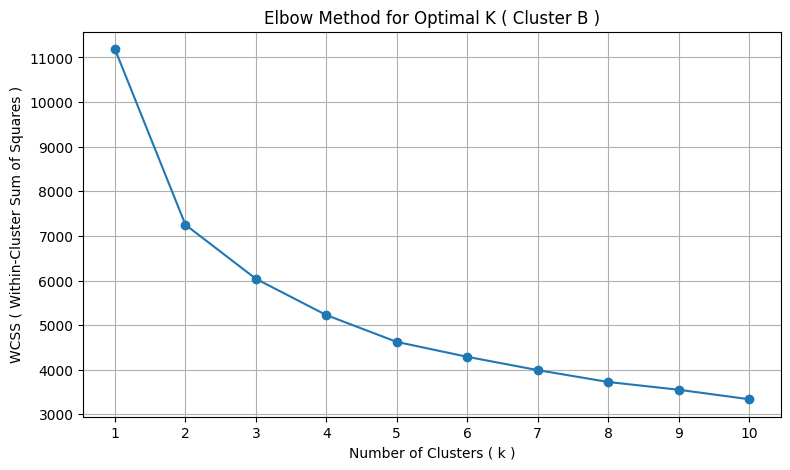

In [ ]:
# 1. WCSS Calculation & Elbow Method Visualization

# Define the range of cluster numbers to test (example: from 1 to 10)
wcss = []  # (Within-Cluster Sum of Squares)

# Run KMeans for k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_b_scaled)
    wcss.append(kmeans.inertia_) # inertia_ represents total WCSS for this model

# Print each n_clusters score
for i, score in enumerate(wcss):
    print(f"Number of clusters: {i+1} → WCSS/Inertia: {score:.2f}")

# Elbow curve visualization
plt.figure(figsize=(9, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K ( Cluster B )')
plt.xlabel('Number of Clusters ( k )')
plt.ylabel('WCSS ( Within-Cluster Sum of Squares )')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
df_customer_filtered['Age_Group_Encoded'].value_counts().sort_index()

Age_Group_Encoded
0    187
1    506
2    685
3    857
4      2
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

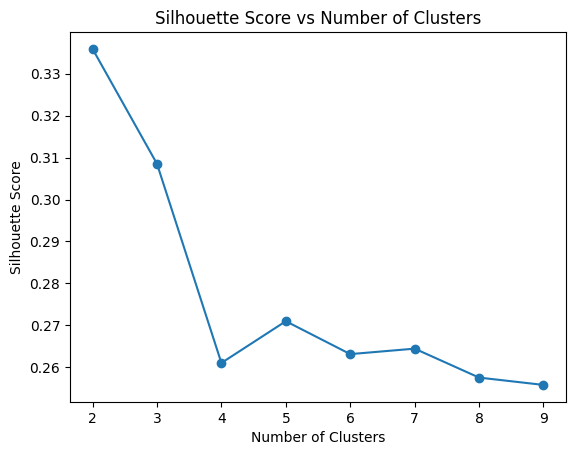

In [ ]:
# The visualization of Silhouette Score based on the number of n_clusters
scores = []
ks = range(2, 10)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(cluster_b_scaled)
    scores.append(silhouette_score(cluster_b_scaled, preds))

plt.plot(ks, scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Showing the Silhouette Score based on the no. of clusters
print("Silhouette Score:")
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(cluster_b_scaled)
    score = silhouette_score(cluster_b_scaled, preds)
    print(f"n_clusters = {k}, silhouette_score = {score:.4f}")

Silhouette Score:
n_clusters = 2, silhouette_score = 0.3359
n_clusters = 3, silhouette_score = 0.3085


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 4, silhouette_score = 0.2610
n_clusters = 5, silhouette_score = 0.2710


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 6, silhouette_score = 0.2631
n_clusters = 7, silhouette_score = 0.2644


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 8, silhouette_score = 0.2575
n_clusters = 9, silhouette_score = 0.2558


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Based on the WCSS/Inertia score, Elbow Curve, Silhouette Score and the types of unique values of Age_Group_Encoded, **I decide to use 5 for n_clusters** to finalize my clustering process with KMeans method.

In other words, the selection of 5 clusters was not only guided by the Elbow Curve (which shows a noticeable flattening of WCSS starting around the 5th point), but also based on the predefined age segmentation (Age_Group), which consists of 5 values:
1. <30.
2. 30–39.
3. 40–49.
4. 50–59.
5. 60+.

In [ ]:
# Dimension check and final clustering preparation before KMeans visualization process
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(cluster_b_scaled)

# Add cluster results to the original DataFrame
cluster_b_df['Cluster'] = clusters

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_13/4043107883.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_b_df['Cluster'] = clusters


## VI. MODEL EVALUATION FOR PART B

Since I have done the clustering preparation above, I'm going to calculate the **SILHOUETTE SCORE** of the model before visualization process takes place.

**This model evaluation is for part B. Clustering based on Age_Group and Purchasing Channels.**

In [ ]:
# Evaluate clustering quality using Silhouette Score
silhouette_avg = silhouette_score(cluster_b_scaled, clusters)
print(f"Silhouette Score for KMeans clustering (n=5) of Part B: {silhouette_avg:.4f}")

Silhouette Score for KMeans clustering (n=5) of Part B: 0.2710


The Silhouette Score of 0.2710 for the KMeans clustering with n=5 in Part B. Clustering based on Age_Group and Purchasing Channel indicates a **weak but acceptable cluster structure**.

This score suggests that the  while some level of cluster separation exists, there is also a significant degree of overlap between clusters. It indicates the boundaries between clusters are not sharply defined.

However, this is not necessarily a bad result, especially if:
- The original dataset (df_customer) contains similar purchasing behavior across different Age_Group, making separation naturally challenging.
- I deliberately chose 5 clusters based on business logic, such as the Age_Group with 5 segments.

Despite the relatively low Silhouette Score, the clustering outcome remains interpretable and aligned with the context, which can provide insights for customer purchasing begavior analysis.

Next I'm going to create KMeans visualization using PCA method and scatter plot.

The objective is to check the clustering results based on Age_Group (and Age_Group_Encoded) against various channels to identify their favorite purchasing channel.

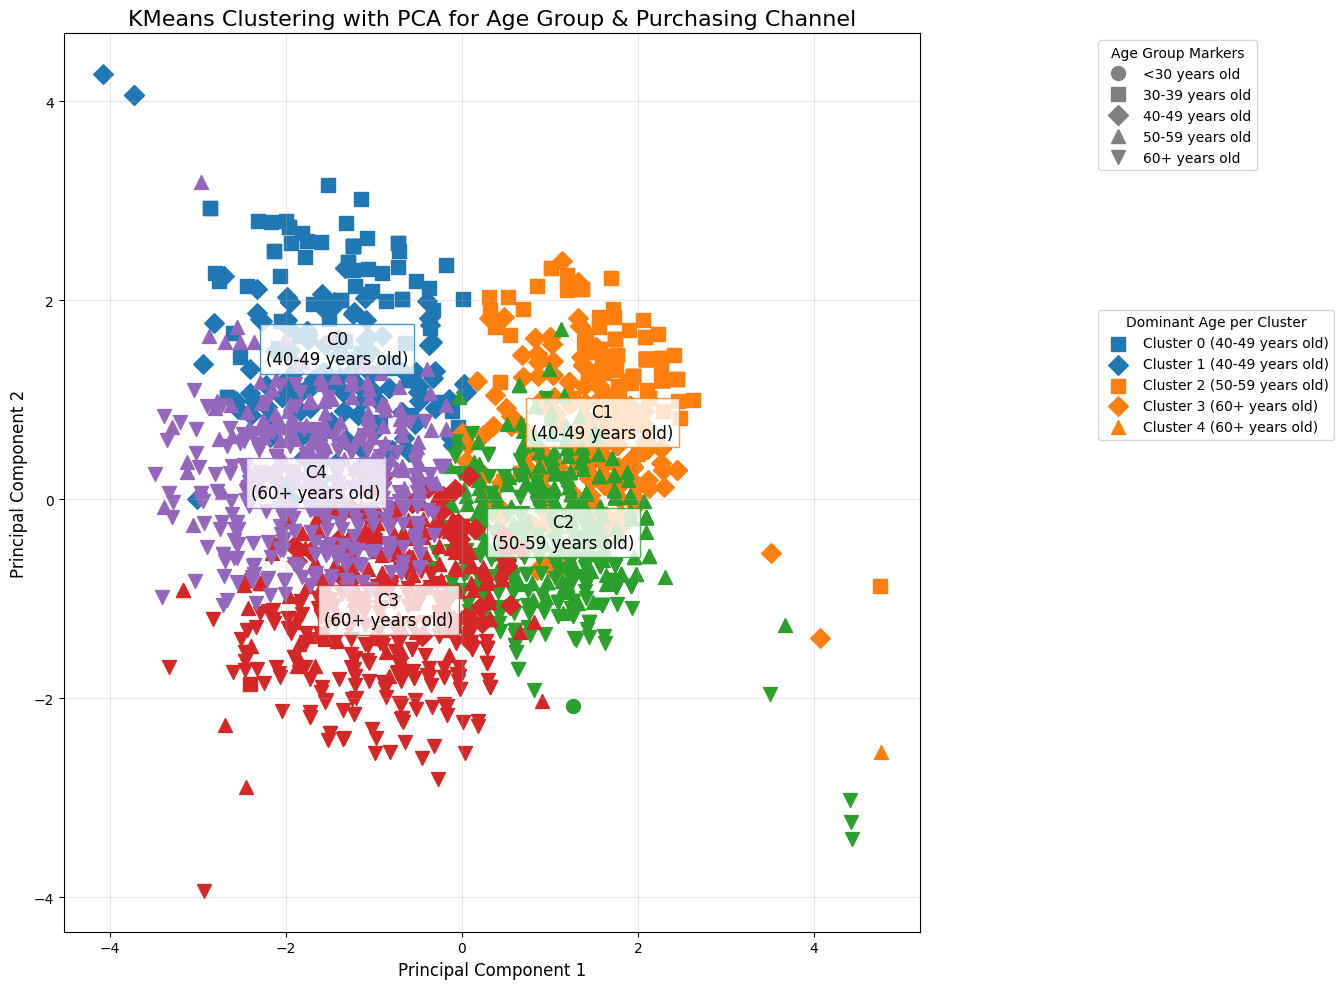

In [ ]:
# Final PCA Visualization for clustering based on Age Group & Purchasing Channel

# 1) Standardize Index for alignment
df_customer_filtered = df_customer_filtered.reset_index(drop=True)

# Normalize Age_Group labels
df_customer_filtered['Age_Group'] = df_customer_filtered['Age_Group'].replace({
    '<30': '<30 years old',
    '30–39': '30-39 years old',
    '40–49': '40-49 years old',
    '50–59': '50-59 years old',
    '60+': '60+ years old'})

# 2) PCA Transformation into 2D
pca = PCA(n_components=2)
cluster_pca_b = pca.fit_transform(cluster_b_scaled)

# 3) Create the DataFrame for plotting on the scatter plot
pca_df_b = pd.DataFrame(data=cluster_pca_b, columns=['PCA1', 'PCA2'])
pca_df_b['Cluster'] = kmeans.labels_

# Do make sure the Age_Group values are aligned
pca_df_b['Age_Group'] = df_customer_filtered['Age_Group'].values

# 4) Define and assign custom marker per Age_Group
age_markers = {
    '<30 years old': 'o', # Circle
    '30-39 years old': 's', # Square
    '40-49 years old': 'D', # Diamond
    '50-59 years old': '^', # Triangle up
    '60+ years old': 'v' # Triangle down
}
pca_df_b['Age_Marker'] = pca_df_b['Age_Group'].map(age_markers)

# 5) Dominant Age Group per Cluster
dominant_age_per_cluster_b = pca_df_b.groupby('Cluster')['Age_Group'].agg(lambda x: x.mode()[0]).to_dict()

# 6) Visualization
plt.figure(figsize=(14, 10))

# Plotting by cluster and Age_Group
for cluster in sorted(pca_df_b['Cluster'].unique()):
    for age_group, marker in age_markers.items():
        subset = pca_df_b[(pca_df_b['Cluster'] == cluster) & (pca_df_b['Age_Group'] == age_group)]
        if not subset.empty:
            plt.scatter(subset['PCA1'], subset['PCA2'],
                        s=100,
                        c=f'C{cluster}',
                        marker=marker,
                        label=f'Cluster {cluster} - {age_group}' if cluster == 0 else "")

# Cluster centroids
cluster_centers_pca_b = pca.transform(kmeans.cluster_centers_)
for i, (x, y) in enumerate(cluster_centers_pca_b):
    plt.text(x, y, f'C{i}\n({dominant_age_per_cluster_b[i]})',
             fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor=f'C{i}'))

# Showing Age_Group marker legends
handles = [plt.Line2D([0], [0], marker=m, color='gray', linestyle='None', markersize=10, label=ag)
           for ag, m in age_markers.items()]
legend1 = plt.legend(handles=handles, title="Age Group Markers", bbox_to_anchor=(1.2, 1), loc='upper left')

# Showing Cluster legend
legend2 = plt.legend([f'Cluster {c} ({dominant_age_per_cluster_b[c]})' for c in sorted(dominant_age_per_cluster_b.keys())],
                     title="Dominant Age per Cluster", bbox_to_anchor=(1.2, 0.7), loc='upper left')
plt.gca().add_artist(legend1)

plt.title('KMeans Clustering with PCA for Age Group & Purchasing Channel', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##

In [ ]:
# Age_Group distribution per cluster
print("\nAge Group Distribution per Cluster:")
print(pd.crosstab(pca_df_b['Cluster'], pca_df_b['Age_Group'], normalize='index').round(2))

# Number of data points per cluster
print("\nNumber of points per Cluster:")
print(pca_df_b['Cluster'].value_counts().sort_index())

# Below is the calculation of the no. of people in each cluster


Age Group Distribution per Cluster:
Age_Group  <30 years old  30-39 years old  40-49 years old  50-59 years old  \
Cluster                                                                       
0                   0.00             0.35             0.65             0.00   
1                   0.00             0.26             0.74             0.00   
2                   0.00             0.00             0.00             0.54   
3                   0.00             0.00             0.13             0.39   
4                   0.00             0.00             0.00             0.30   

Age_Group  60+ years old  
Cluster                   
0                   0.00  
1                   0.00  
2                   0.46  
3                   0.48  
4                   0.70  

Number of points per Cluster:
Cluster
0    215
1    419
2    686
3    448
4    469
Name: count, dtype: int64


**Below is the average frequency of purchase and web visitation per each Purchasing Channel based ONLY on Cluster.**

**The figures below explain the profile of each Cluster in terms of average frequency of purchase and web visitation per each purchasing channel regardless of customers' Age_Group.**

In [ ]:
# Combining the Cluster data above with the filtered Purchasing Channel variables
cluster_channel = pd.DataFrame({
    'Cluster': kmeans.labels_,
    'NumWebPurchases': df_customer_filtered['NumWebPurchases'],
    'NumCatalogPurchases': df_customer_filtered['NumCatalogPurchases'],
    'NumStorePurchases': df_customer_filtered['NumStorePurchases'],
    'NumWebVisitsMonth': df_customer_filtered['NumWebVisitsMonth'],
})

# Calculating the average purchasing channel for each Cluster
purchasing_channel_means = cluster_channel.groupby('Cluster').mean()
pd.set_option('display.float_format', '{:.2f}'.format)
print(purchasing_channel_means)

# Below is the average frequency of purchase and web visitation per each purchasing channel based on each cluster

         NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Cluster                                                            
0                   4.87                 5.71               8.82   
1                   2.19                 0.55               3.23   
2                   2.24                 0.70               3.42   
3                   7.86                 3.19               7.56   
4                   4.52                 5.52               8.47   

         NumWebVisitsMonth  
Cluster                     
0                     2.80  
1                     6.76  
2                     6.35  
3                     6.39  
4                     2.66  


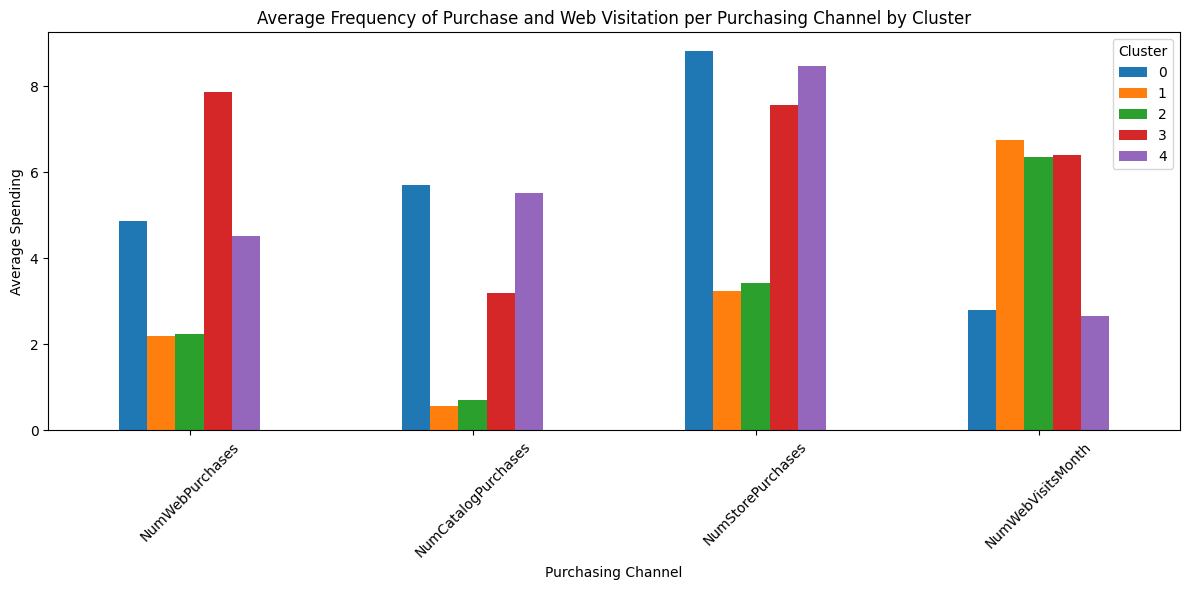

In [ ]:
# Visualization of each Cluster's average frequency of purchase and web visitation per each Purchasing Channel
# The visualization is only based on Cluster, regardless of each Age_Group
cluster_average_frequency = cluster_channel.groupby('Cluster').mean()

# Bar Chart Plot
cluster_average_frequency.T.plot(kind='bar', figsize=(12, 6))

# Display format setting
plt.title('Average Frequency of Purchase and Web Visitation per Purchasing Channel by Cluster')
plt.xlabel('Purchasing Channel')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

**Below is the average frequency of purchase and web visitation based on Age_Group inside each Cluster.**

**The figures below explain the profile of each Age_Group in terms of average frequency of purchase and web visitation per each Purchasing Channel in each Cluster.**

In [ ]:
# Combining and adding Age_Group column into the cluster_results data frame
cluster_channel['Age_Group'] = df_customer_filtered['Age_Group']

# Grouping and calculating average purchasing of each Channel per Age_Group and Cluster
insight = cluster_channel.groupby(['Cluster', 'Age_Group']).mean()
pd.set_option('display.float_format', '{:.2f}'.format)
print(insight)

# Below is the average frequency of purchase and web visitation based on each Cluster AND Age Group

                         NumWebPurchases  NumCatalogPurchases  \
Cluster Age_Group                                               
0       <30 years old                NaN                  NaN   
        30-39 years old             4.88                 5.84   
        40-49 years old             4.86                 5.64   
        50-59 years old              NaN                  NaN   
        60+ years old                NaN                  NaN   
1       <30 years old                NaN                  NaN   
        30-39 years old             2.18                 0.59   
        40-49 years old             2.20                 0.54   
        50-59 years old             0.00                 0.00   
        60+ years old                NaN                  NaN   
2       <30 years old               2.00                 0.50   
        30-39 years old              NaN                  NaN   
        40-49 years old              NaN                  NaN   
        50-59 years old  

/tmp/ipykernel_13/1862910085.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  insight = cluster_channel.groupby(['Cluster', 'Age_Group']).mean()


I have finished the clustering process using KMeans along with its vizualization using PCA and Seaborn scatter plot.

I'm going to use heatmap plot to visualize shopping/purchasing pattern based on customer's Age_Group and Purchasing Channel.

/tmp/ipykernel_13/3609473231.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_summary = heatmap_customer_df_b.groupby('Age_Group')[['NumWebPurchases', 'NumCatalogPurchases',


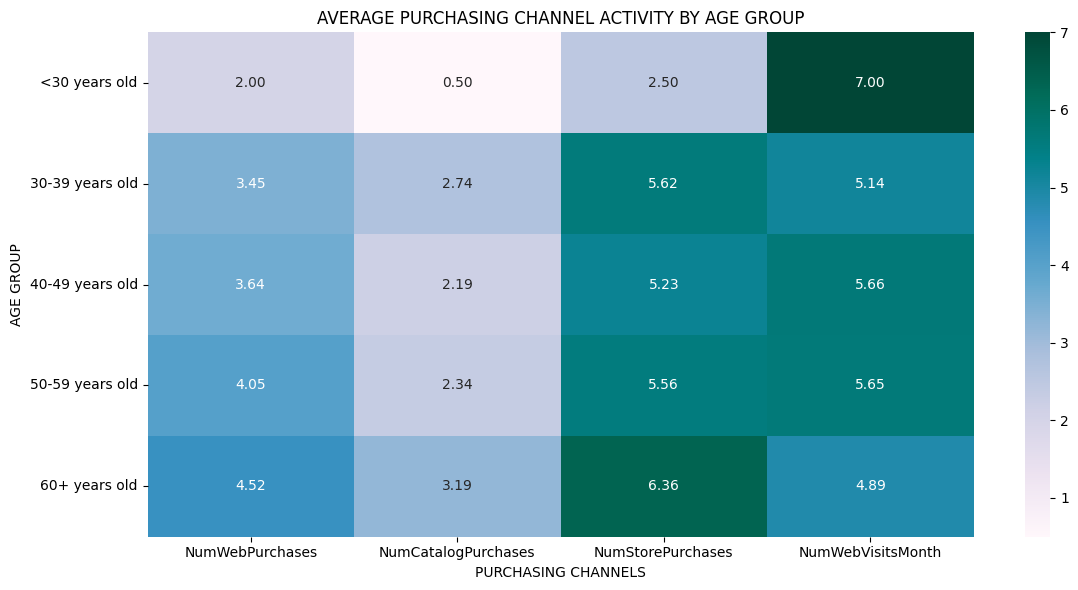

In [ ]:
# Make a copy of the customer DataFrame
heatmap_customer_df_b = df_customer_filtered.copy()

# Group by Age_Group and calculate mean frequency of purchase and web visitation for each channel
group_summary = heatmap_customer_df_b.groupby('Age_Group')[['NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].mean()

# Create a heatmap to show average frequency of purchase and web visitation for each channel per Age_Group
plt.figure(figsize=(12, 6))
sns.heatmap(group_summary, annot=True, fmt=".2f", cmap="PuBuGn")
plt.title("AVERAGE PURCHASING CHANNEL ACTIVITY BY AGE GROUP")
plt.xlabel("PURCHASING CHANNELS")
plt.ylabel("AGE GROUP")
plt.tight_layout()
plt.show()

From the average frequency of purchase and web visitation heatmap above, we can get some information as following,

1. Surpisingly, more online purchases (NumWebPurchases) are done by older customers aged >50 years old compared to younger customers.
2. Shopping frequency with catalog has the lowest figure (NumCatalogPurchases), with customers aged 60+ years old have the highest interest in shopping with catalog.
3. All customers prefer to do grocery run in-store (NumStorePurchases) regardless of their age.
4. The number of web visits per month remains high regardless of customer's age (NumWebVisitsMonth).

The summary of part **B. Clustering based on Age_Group and Purchasing Channels**.

I. We have different clusters of customers such as,

1.	**CLUSTER 0**: Strong middle-aged in-store buyers and high catalog usage.

a.	Age group:

- 35% customers aged 30-39 years old.
- 65% customers aged 40-49 years old.

b.	Key traits:

- High number of purchases conducted in-store and through catalog.
- Low number of web visits yet somehow yield moderate number of web purchases.

c.	Action:

- Launch catalog exclusive promotions and in-store bundle deal to increase total spending per visit while maintaning customer loyalty.

2.	**CLUSTER 1**: Low engagement middle-aged customers across all purchasing channels.

a.	Age group:

- 26% customers aged 30-39 years old.
- 74% customers aged 40-49 years old.

b.	Key traits:

- Minimal catalog purchases.
- Low number of web based and in-store purchases.
- High number of web visits but poor conversion.

c.	Action:

- Create targeted online campaigns on the website to increase conversion from frequent website visitors.
- For example, display ads or follow-up messages like "complete your purchase and get free delivery!"

3.	**CLUSTER 2**: Old and senior customers with mixed channel preference.

a.	Age group:

- 54% customers aged 50-59 years old.
- 46% customers aged 60+ years old.

b.	Key traits:

- Moderate purchases across all available purchasing channels.
- Relatively balanced behavior.

c.	Action:

- No urgent campaigns/promotions are needed for this cluster.
- A phone-in service can be designed to assist old and senior customers during their visit to the store for quicker checkout duration.

4.	**CLUSTER 3**: Middle-aged, older, and senior customers with moderate in-store and website purchases.

a.	Age group:

- 13% customers aged 40-49 years old.
- 39% customers aged 50-59 years old.
- 48% customers aged 60+ years old.

b.	Key traits:

- Engaged across multiple purchasing channels.
- Moderate in-store and web purchases.

c.	Action:

-	Create loyalty or reward programs targeting older and senior customers (e.g. supplement or health products).

5.	**CLUSTER 4**: Older and senior customers with strong preference to shop in-store and using catalog.

a.	Age group:

- 30% customers aged 50-59 years old.
- 70% customers aged 60+ years old.

b.	Key traits:

- Strong in-store and highest catalog purchases.
- Low online engagement (web).

c.	Action:

- Maintain in-store and physical catalogs promotions and campaigns.
- Start developing a senior-friendly digital store app.

II. Strategic **insights** that I get from the clustering results between customers' **Age_Group** and various **purchasing channels** are as following,

1. Older and senior customers dominate most clusters:
- Cluster 2, 3, and 4 are heavily populated with customers aged 50 and above.
- These segments respond better to catalog and store-based promotions, offering senior-only discounts or benefits could increase engagement.

2. Underrepresentation of younger customers (<30):
- Almost no customers under 30 across all clusters.
- The store MUST start utilizing social media, SMS/WA, and store mobile app to blast promotions and marketing campaings.
- The number of younger customers are expected to increase after utilizing social media, SMS/WA and store mobile app for blasting promotions and marketing campaigns.

3. Customers aged 30-39 years old are split between:
- Concentrated in high spending (cluster 0) segment and low spending (cluster 1) segment.
- The store can focus to attract customers in cluster 1 with time sensitive deals.

4. Declining Catalog usage:
- Only cluster 4 presents high catalog ourchases.
- The store can start to reduce its budget for printing Catalog as it has become the purchasing channel with the least activity.
- The store can start utilizing spare budget for other marketing/promotion purposes to attract younger customers and maintain older ones.

III. Other than previous insights & recommendations above, I have other Age_Group focused recommendations such as,

1. Customers aged <30 years old:
- They ignore catalogs and underrepresented.
- The store can start blasting promotion using digital strategies like utilizing social media and investing in TikTok or Instagram ads.
- Younger customers are most likely to start shopping through multiple purchasing channels after implementing digital strategies.

2. Customers aged 30-39 years old:
- Purchase through online and offline channels.
- The store can promote multichannel experiences, e.g. buy online & pick up in-store or buy online & free delivery (bundle programs).

3. Customers aged 40-60+ years old:
- Likely to purchase through catalog and in-store.
- Optimize store for senior customers, e.g. such as: assistance for cashless payment, partnership with healthy food vendors (e.g. fresh juice), and health products provider (e.g. massage chairs).

## VII. EXECUTIVE SUMMARY

### 1. OVERVIEW

In short, this project explores and segment customer purchasing behavior using unsupervised machine learning techniques.

The dataset was sourced from a grocery store firm and made available by Kaggle. The dataset itself was probably compiled between July 2012 until June 2014, based on customer's earliest and latest enrollment date. It contains detailed demographic, transactional, and campaign response data from 2,240 customers.

My main objectives for this dataset are as following,
1. Understand customer characteristics and purchasing patterns.
2. Cluster customers into meaningful groups.
3. Derive actionable business insights for strategic marketing & personalization initiative.

### 2. DATASET DESCRIPTION
The dataset has 29 variables (columns) which can be categorized into 5 themes such as:
1. People/demographic (e.g. age, education, marital status).
2. Product spendings, the total amount spent to buy various products over a period of time.
3. Promotional campaigns, customer responses to multiple marketing campaigns.
4. Place/purchasing channels (e.g. website, catalog, store).
5. Other variables (e.g. Z_CostContact, Z_Revenue).

### 3. KEY STEPS & METHODOLOGY

#### i. Data Exploration and Cleaning
a. Loaded dataset from Kaggle.  
b. Identified null values.  
c. Filled rows with null values with mean/median/mode value.  
d. Removed rows with null values (optional).  
e. Standardized numerical features/variables.  
f. Created new features/variables such as `Age_Group by` grouping `Age` into labeled bins.  
g. Label encoded categorical variables for modeling.  

#### ii. Exploratory Data Analysis (EDA)
a. Visualized average purchasing activity per age group utilizing heatmaps and PCA.

b. Made observations to various age groups to learn their habits.

#### iii. Feature Selection and Scaling
a. Selected relevant features/variables related to Age Group, Products and Purchasing Channels.  
b. Standardized data using `StandardScaler`.

#### iv. Clustering with KMeans  

a. Applied KMeans method for clustering.  
b. Determined optimal number of clusters (`n_clusters`) using the Elbow method.  
c. Chose `n_clusters = 5` as the optimal number.  
d. Calculated Silhouette Score for each clustering process.  

#### v. Cluster Analysis

a. Assigned cluster labels to each customer.  
b. Identified average spending based on purchased products.
c. Compared average spending and frequency through various purchasing channels.   
d. Conducted further segmented analysis by both `Cluster` and `Age_Group`. variables to uncover spending habits and patterns.  

### vi. Summary

The entire analysis process from data exploration, cleaning, transformation, to customer segmentation using unsupervised learning was conducted systematically and aligned with business logic.

The choice of k = 5 clusters was made to match the customer age groups, ensuring that the insights remain relevant and actionable for business needs.

### 4. INSIGHTS AND INTERPRETATION

#### A. Clustering based on Age_Group and Products
It was found that the current main clusters of customers based on purchased products are as following,
1. Senior customers with high-spending habits.
2. Budget-conscious senior customers.
3. Health-focused middle-aged customers.
4. Mixed-aged balanced customers.
5. Young spenders.

#### B. Clustering based on Age_Group and Purchasing Channels
It was found that the current main clusters of customers based on purchasing channels are as following,
1. Strong middle-aged in-store buyers and high catalog usage.
2. Low engagement middle-aged customers across all purchasing channels.
3. Old and senior customers with mixed channel preference.
4. Middle-aged, older, and senior customers with moderate in-store and website purchases.
5. Older and senior customers with strong preference to shop in-store and using catalog.

#### 5. TOOLS AND TECHNOLOGIES

1. Python (Pandas, Numpy, Matplotlib, Seaborn, Scikit Learn).
2. Clustering with KMeans and Elbow method.  
3. Clustering score calculation with Scikit Learn and WCSS/Inertia.
4. Data visualization with heatmaps, PCA and scatter plots.